In [302]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from prfpy_csenf.csenf_plot_functions import *
from dag_prf_utils.prfpy_functions import *
from dag_prf_utils.prfpy_ts_plotter import *
from dag_prf_utils.plot_functions import *
from dag_prf_utils.utils import *
from dag_prf_utils.pycortex import *


from amb_scripts.load_saved_info import *
from amb_scripts.plot_functions import *
plot_cols = get_plot_cols()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [294]:
# START LOGGING THIS NOTEBOOK
import figure_finder as ff
out_file = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/derivatives/notebook_timeline/'
if not os.path.exists(out_file):
    os.mkdir(out_file)
name = f'MAIN_2024-03-19'
fig_saver = ff.FigureSaver(
    name            = name,
    path            = out_file,
    save_mode       = True, 
    fig_overwrite   = 'ow',     
    save_svg_w_code = False,
    save_svg  = False,
    save_png  = True,
    save_pdf  = True,
    folder_ow = True,
    )


FOLDER ALREADY EXISTS!
Deleting and remaking folder


# Load saved info

#### Load qCSF

In [295]:
sub_list = ['sub-02' ]#, 'sub-02']
ses_list = ['ses-1', 'ses-2']
qCSF_info = {}
for sub in sub_list:
    qCSF_info[sub] = {}
    for ses in ses_list:
        qCSF_info[sub][ses] = amb_load_qcsf(sub, eye_list=['L', 'R'], ses=ses)


p2plot_nice = {
    'nothingrois' : 'ROI borders',
    'sfmax': 'SF_{max} (c/deg)',
    'aulcsf': 'normalized AUC (%)',
    'SFp': 'SF_p (c/deg)',
    'CSp': 'CS_p (a.u.)',
    'crf_exp': 'slope_{crf} (a.u.)',
    'rsq' : 'variance explained (%)',
    'ecc' : 'eccentricity (deg)',
    'size_1' : 'size',
}

#### Load run correlation (akin to rsq ceiling)

In [296]:
run_corr = {}
for sub in sub_list:
    run_corr[sub] = {}
    for i_ses,ses in enumerate(ses_list):   
        for model in ['gauss', 'csf']:
            for eye in ['L', 'R']:
                if model=='gauss':
                    task = f'pRF{eye}E'
                else:
                    task = f'CSF{eye}E'
                
                run_corr[sub][f'{eye}_{i_ses+1}_{model}'] = amb_load_run_corr(
                    sub=sub,
                    task_list=task,
                    ses=ses,
                )[task]

run_corr[sub].keys()          

dict_keys(['L_1_gauss', 'R_1_gauss', 'L_1_csf', 'R_1_csf', 'L_2_gauss', 'R_2_gauss', 'L_2_csf', 'R_2_csf'])

In [297]:
# Load prfpy_stim
prfpy_stim = {}
prfpy_stim['gauss'] = amb_load_prfpy_stim('pRF')
prfpy_stim['csf'] = amb_load_prfpy_stim('CSF')

prfpy_model = {}
prfpy_model['gauss'] = Iso2DGaussianModel(stimulus=prfpy_stim['gauss'])
prfpy_model['csf'] = CSenFModel(stimulus=prfpy_stim['csf'])

Number of timepoints: 214
Number of unique SF levels: 6, [ 0.5  1.   3.   6.  12.  18. ]
Number of unique CON levels: 14, [ 0.25   0.39   0.607  0.946  1.475  2.299  3.582  5.583  8.701 13.56
 21.134 32.937 51.332 80.   ]


In [298]:
roi_fit = 'all'
fit_stage='iter'

model_list = ['gauss', 'csf']#, 'css', 'dog', 'norm']
prf_multi = {}

for sub in sub_list:
    prf_obj_list = [] 
    prf_id_list = []
    for i_ses,ses in enumerate(ses_list):        
        for eye in ['L', 'R']:    
            for model in model_list:
                if 'csf' in model:
                    task = f'CSF{eye}E'
                    # fit_stage = 'grid'
                else:
                    task = f'pRF{eye}E'
                    # fit_stage = 'iter'

                this_prf_data = amb_load_prf_params(
                    sub=sub,
                    task_list=task,
                    model_list=model,
                    roi_fit=roi_fit, 
                    fit_stage=fit_stage,
                    ses=ses
                )[task][model]
                this_real_ts = amb_load_real_tc(sub=sub, task_list=task, ses=ses)[task]
                

                if model=='csf':
                    this_obj = CSenFPlotter(
                        prf_params=this_prf_data,
                        real_ts = this_real_ts,                        
                        prfpy_model = prfpy_model['csf'],
                    )
                else:
                    this_obj = TSPlotter(
                        prf_params=this_prf_data,
                        real_ts = this_real_ts,                        
                        model='gauss',
                        prfpy_model = prfpy_model['gauss'],
                    )

                prf_obj_list.append(this_obj)
                prf_id_list.append(f'{eye}_{i_ses+1}_{model}')   
            
    prf_multi[sub] = PrfMulti(prf_obj_list, prf_id_list)

prf_params.shape[-1]=8
include hrf = True
include rsq = True
prf_params.shape[-1]=10
hrf=params[:,7,8], rsq=params[:,9]
prf_params.shape[-1]=8
include hrf = True
include rsq = True
prf_params.shape[-1]=10
hrf=params[:,7,8], rsq=params[:,9]
prf_params.shape[-1]=8
include hrf = True
include rsq = True
prf_params.shape[-1]=10
hrf=params[:,7,8], rsq=params[:,9]
prf_params.shape[-1]=8
include hrf = True
include rsq = True
prf_params.shape[-1]=10
hrf=params[:,7,8], rsq=params[:,9]


In [241]:
this_prf_data = amb_load_prf_params(
    sub=sub,
    task_list='CSFLE',
    model_list='csf',
    roi_fit=roi_fit, 
    fit_stage='grid',
    ses='ses-1'
)['CSFLE']['csf']

In [244]:
this_prf_data[1,:]

array([ 0.75      ,  0.42857143, 28.57142857,  0.68      ,  0.71428571,
        1.41251314, -0.50711387,  1.        ,  0.        ,  0.14179966])

# [1] V1 Foveal CSF

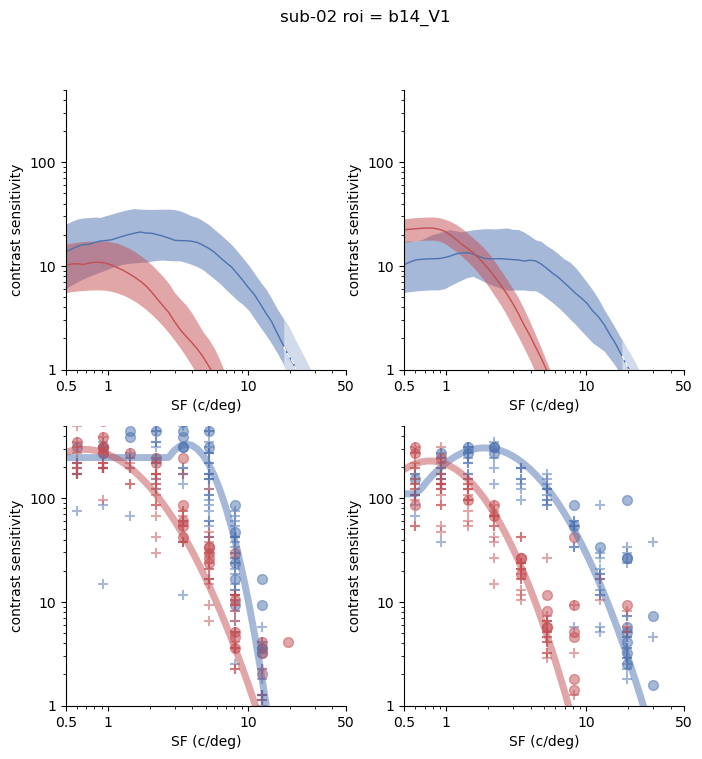

In [308]:
# Find nice voxel...
roi = 'b14_V1'
min_rsq = 0.3
max_ecc = 5

for sub in sub_list:
    fig,axs = plt.subplots(2,2)
    fig.set_size_inches(8,8)
    fig.suptitle(f'{sub} roi = {roi}')
    roi_mask = amb_load_roi(sub, roi)
    for i_ses,ses in enumerate([1, 2]):
        for eye in ['L', 'R']: # , 'R']:
            vx_mask = prf_multi[sub].return_vx_mask({
                f'{eye}_{ses}_csf-min-rsq'          : min_rsq,
                f'{eye}_{ses}_gauss-min-rsq'        : min_rsq,
                f'{eye}_{ses}_gauss-max-ecc'        : max_ecc,
                'roi'           : roi_mask,
            })  

            params = prf_multi[sub].prf_obj[f'{eye}_{ses}_csf'].pd_params.iloc[vx_mask]

            ncsfplt_csf_curve(
                ax=axs[0][i_ses],
                params=params, 
                line_label=f'{eye} eye',
                line_col=plot_cols[f'{eye}E'],
            )
            ncsf_plt_qCSF(
                qCSF_info[sub][f'ses-{ses}'][eye],
                ax=axs[1][i_ses],
                line_label=f'{eye} eye',
                line_col=plot_cols[f'{eye}E'],
            )
            #
            # log_sf_grid  = np.linspace(
            #     np.log10(csenf_stim.SFs[0]),
            #     np.log10(50), 
            #     50)
            # sfs_for_plot = 10**log_sf_grid            
            # b_log_csf = 10**qcsf_curve(
            #     sfs_for_plot,
            #     qCSF_info[sub][f'ses-{ses}'][eye]['peakCS'],
            #     qCSF_info[sub][f'ses-{ses}'][eye]['peakSF'],
            #     qCSF_info[sub][f'ses-{ses}'][eye]['bdwth'],
            #     qCSF_info[sub][f'ses-{ses}'][eye]['lowSFtrunc'],
            # )            
            # axs[1][i_ses].plot(sfs_for_plot, b_log_csf, color=plot_cols[f'{eye}E'], marker='*', label=f'{eye}')
            # ncsfplt_set_csf_ax(axs[1][i_ses])
            # Compare CSFs: *  general


In [289]:
b = qCSF_info[sub][f'ses-{ses}'][eye]

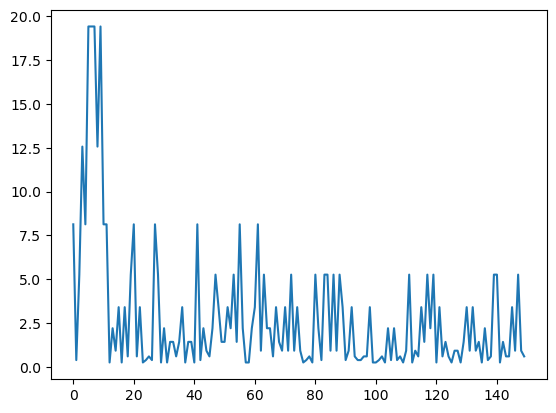

Stopping server


In [291]:
plt.plot(b['SF_history'])

In [ ]:

plt.figure() 
for eye in ['L', 'R']:
    vx_mask = prf_multi[sub].return_vx_mask({
        f'{eye}_{ses}_csf-min-rsq'          : min_rsq,
        f'{eye}_{ses}_gauss-min-rsq'        : min_rsq,
        f'{eye}_{ses}_gauss-max-ecc'        : max_ecc,
        'roi'           : roi_mask,
    })  

    params = prf_multi[sub].prf_obj[f'{eye}_{ses}_csf'].pd_params.iloc[vx_mask]
    print(params.shape)

    ncsfplt_crf_curve(
        ax=plt.gca(),
        params=params, ow_Qs = False, # fix to 20%
        sf_for_crf=5,
        # line_col=roi_cols[roi], 
        line_label=f'{eye} eye',
        line_col=plot_cols[f'{eye}E'], do_log=True, 
    )
    plt.legend()    
# plt.legend()
# # fig_saver.add_img(fig=plt.gcf(), fig_name=f'ts_fig_p1')

In [146]:
csenf_stim.CONs

array([ 0.25      ,  0.38962234,  0.60722228,  0.94634947,  1.47487559,
        2.29857792,  3.58230926,  5.5829909 ,  8.70103197, 13.56046584,
       21.13384187, 32.9368679 , 51.33175852, 80.        ])

# [2] Eccentricity plots -> V1 

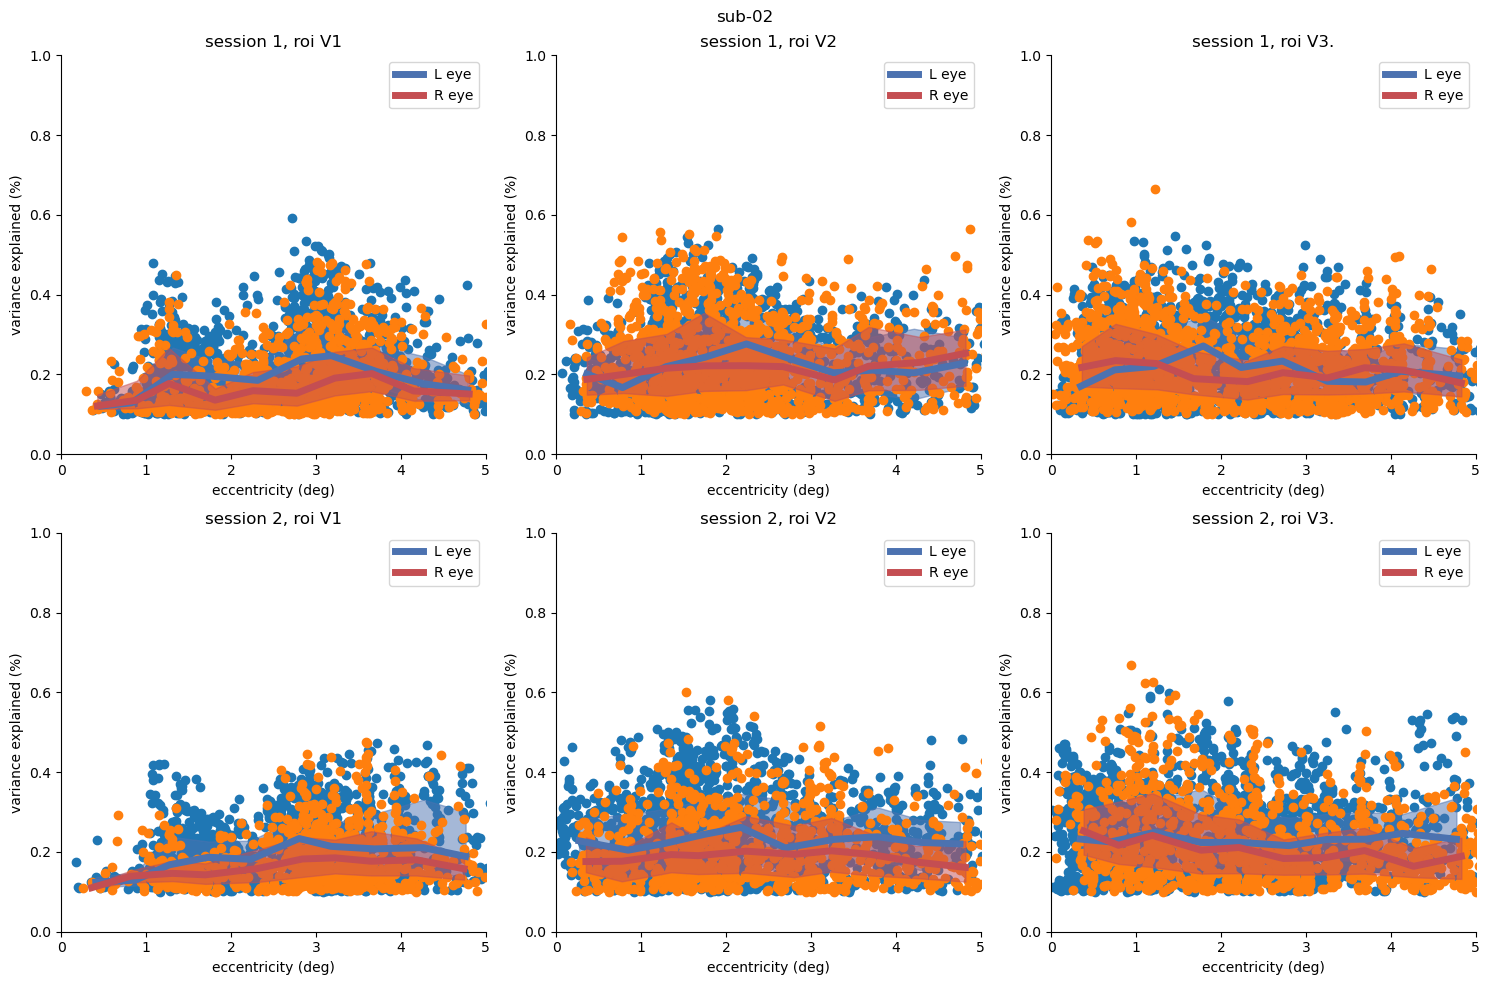

In [319]:

# sns.set_context('paper')
y_param = 'csf-rsq'
min_rsq = 0.3
y_lim = [0,1]
roi_list = ['b14_V1', 'b14_V2', 'b14_V3.']
for sub in sub_list:
    fig,axs = plt.subplots(2,3)
    fig.set_size_inches(5*3,5*2)
    fig.suptitle(sub)

    for i_roi, roi in enumerate(roi_list):
        for i_ses, ses in enumerate(['1','2']):
            ax = axs[i_ses][i_roi]
            for i_eye, eye in enumerate(['L', 'R']):
                # print(ses)
                # print(roi)
                roi_mask = amb_load_roi(sub, roi)
                th = {
                    f'{eye}_{ses}_gauss-min-rsq':min_rsq,
                    f'{eye}_{ses}_gauss-min-rsq':min_rsq,
                    f'{eye}_{ses}_csf-min-rsq':min_rsq,

                }
                prf_multi[sub].scatter(
                    px=f'{eye}_{ses}_gauss-ecc',
                    py=f'{eye}_{ses}_{y_param}',
                    do_line=True,
                    bins=np.linspace(0,5,11),
                    do_scatter=True,
                    ax=ax,
                    line_label=f'{eye} eye',
                    th_plus={'roi':roi_mask},
                    line_col = plot_cols[f'{eye}E'],
                    x_lim=[0,5],
                    y_lim=y_lim,
                    do_bars=False, 
                    do_shade=True, 
                    err_type='pc-75'
                )
                ax.set_title(f'session {ses}, roi {roi.replace("b14_", "")}')
                # ax.set_yscale('log')
                # ax.set_aspect('equal')
                # ax.set_axis('square') # change to be square
                ax.set_xlabel(f'{p2plot_nice["ecc"]}')
                ax.set_ylabel(f'{p2plot_nice[y_param.split("-")[-1]]}')
    fig.set_tight_layout('tight')

# ECC

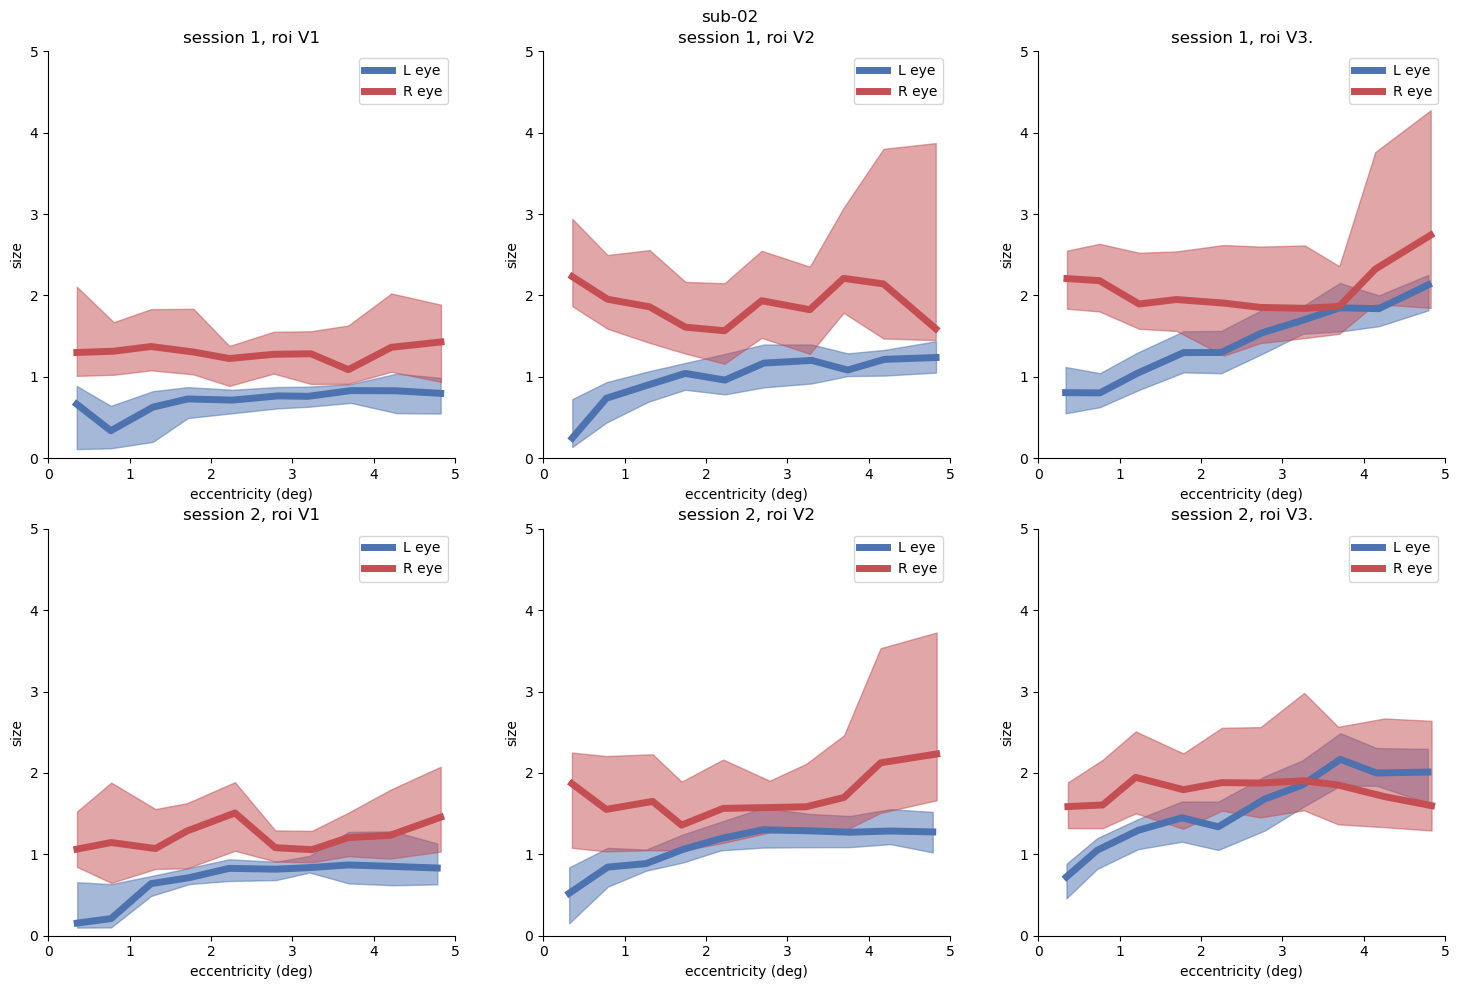

In [303]:

# sns.set_context('paper')
y_param = 'gauss-size_1'
min_rsq = 0.3 
y_lim = [0,5]
roi_list = ['b14_V1', 'b14_V2', 'b14_V3.']
for sub in sub_list:
    fig,axs = plt.subplots(2,3)
    fig.set_size_inches(5*3,5*2)
    fig.suptitle(sub)

    for i_roi, roi in enumerate(roi_list):
        for i_ses, ses in enumerate(['1','2']):
            ax = axs[i_ses][i_roi]
            for i_eye, eye in enumerate(['L', 'R']):
                # print(ses)
                # print(roi)
                roi_mask = amb_load_roi(sub, roi)
                th = {
                    f'{eye}_{ses}_gauss-min-rsq':min_rsq,
                    f'{eye}_{ses}_gauss-min-rsq':min_rsq,
                    # f'{eye}_{ses}_csf-min-rsq':min_rsq,

                }
                prf_multi[sub].scatter(
                    px=f'{eye}_{ses}_gauss-ecc',
                    py=f'{eye}_{ses}_{y_param}',
                    do_line=True,
                    bins=np.linspace(0,5,11),
                    do_scatter=False,
                    ax=ax,
                    line_label=f'{eye} eye',
                    th_plus={'roi':roi_mask},
                    line_col = plot_cols[f'{eye}E'],
                    x_lim=[0,5],
                    y_lim=y_lim,
                    do_bars=False, 
                    do_shade=True, 
                    err_type='pc-75'
                )
                ax.set_title(f'session {ses}, roi {roi.replace("b14_", "")}')
                ax.set_aspect('equal')
                # ax.set_axis('square') # change to be square
                ax.set_xlabel(f'{p2plot_nice["ecc"]}')
                ax.set_ylabel(f'{p2plot_nice[y_param.split("-")[-1]]}')
    fig.set_tight_layout('tight')

# [x] TS plots

In [130]:
# Find nice voxel...
sub = 'sub-02'

roi = 'b14_V1'
min_rsq = 0.4
roi_mask = amb_load_roi(sub, roi)
vx_mask = prf_multi[sub].return_vx_mask({
    'L_1_csf-min-rsq'       : min_rsq,
    'L_1_gauss-min-rsq'     : min_rsq,
    'L_1_gauss-bound-ecc'   : [0.5,3],
    'R_1_csf-min-rsq'       : min_rsq,
    'R_1_gauss-min-rsq'     : min_rsq,
    'R_1_gauss-bound-ecc'   : [0.5,3],
    'roi'           : roi_mask,
})  

print(np.where(vx_mask))
idx = 145596


plt.figure()

params = pars_obj[sub].prf_obj['csf'].pd_params.iloc[vx_idx[roi]]

ncsfplt_crf_curve(
    params=params, ow_Qs = True, # fix to 20%
    line_col=roi_cols[roi], line_label=roi,
)
plt.legend()
# fig_saver.add_img(fig=plt.gcf(), fig_name=f'ts_fig_p1')

Number of timepoints: 214
Number of unique SF levels: 6, [ 0.5  1.   3.   6.  12.  18. ]
Number of unique CON levels: 14, [ 0.25   0.39   0.607  0.946  1.475  2.299  3.582  5.583  8.701 13.56
 21.134 32.937 51.332 80.   ]
(array([145596, 145608]),)


# [2] 

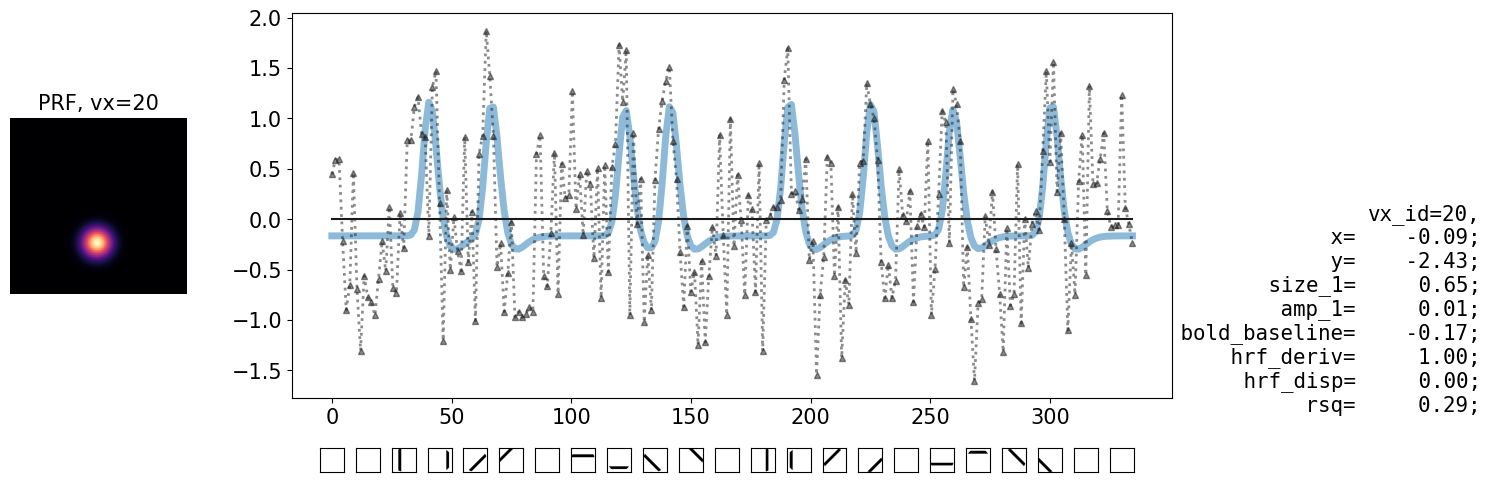

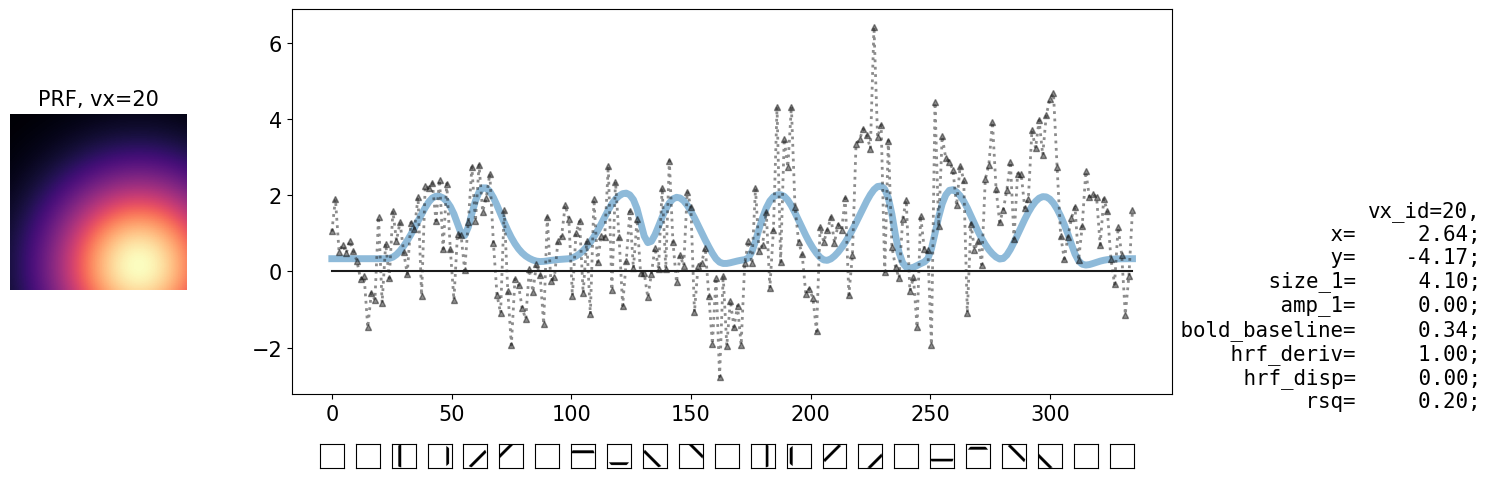

In [231]:
# prf_multi[sub].prf_obj['L_1_csf'].prf_ts_plot(10)
# prf_multi[sub].prf_obj['R_1_csf'].prf_ts_plot(10)
# pm = PyctxMaker(
#     sub = sub,
#     fs_dir = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/derivatives/freesurfer',
#     output_dir = sub_pyc_file,
#     )


# hemi = 'lh'
# idx = 286205
# if hemi!='lh':
#     idx += pm.n_vx['lh']
sub = 'sub-02'
idx = 20
# idx = weird_idx[idx]
prf_multi[sub].prf_obj['L_2_gauss'].prf_ts_plot(idx)
prf_multi[sub].prf_obj['R_2_gauss'].prf_ts_plot(idx)
# plt.figure()
# prf_multi[sub].prf_obj['L_1_csf'].prf_ts_plot(idx)
# plt.figure()
# prf_multi[sub].prf_obj['R_1_csf'].prf_ts_plot(idx)

In [233]:
vx_mask = prf_multi[sub].prf_obj['R_1_gauss'].return_vx_mask({
    'min-rsq':.3, 
    'roi':amb_load_roi(sub, 'weird_blob')
    })

print(np.where(vx_mask)[0].shape)
weird_idx = np.where(vx_mask)[0]

(385,)


In [115]:
np.where(prf_multi[sub].return_vx_mask({'all-min-rsq':.3}))

(array([   925,   1543,   1818,   1826,   2098,   3391,   3787,   3788,
          3831,   3833,   3905,   4252,   4264,   4348,   4688,   5155,
          5668,   5688,   5692,   5698,   5713,   6215,   6225,   9243,
          9904,  12013,  12185,  13475,  13487,  13505,  14181,  18857,
        127133, 134895, 139641, 141191, 141808, 142963, 144964, 145128,
        146408, 146971, 147324, 147976, 148092, 148518, 149252, 157924,
        159109, 274981, 280909, 286205]),)

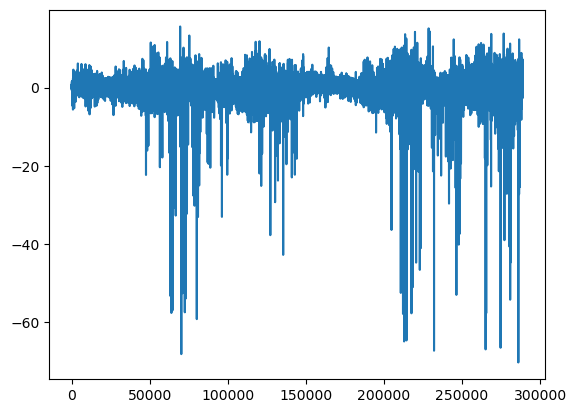

In [214]:
roi_mask = amb_load_roi(sub, 'weird_blob')
plt.plot(np.median(prf_multi[sub].prf_obj['L_1_gauss'].real_ts[~roi_mask,:], axis=0))

In [64]:

prf_multi[sub].prf_obj['L_1_gauss'].n_vx

AttributeError: 'TSPlotter' object has no attribute 'n_vx'

In [100]:
# prf_multi['sub-02'].scatter(
#     px='L_1_gauss-size_1', py='R_1_gauss-size_1', 
#     th_plus={'L_1_gauss-max-ecc':5, 'R_1_gauss-max-ecc':5},
#     do_id_line=True, do_line=True, do_shade=True,  
# )


In [246]:
import pickle

data_path = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/derivatives_bu_240319/amb-csf/sub-01/ses-1/sub-01_ses-1_CSFLE_roi-all_data-fits_stage-grid_desc-csf-params.pkl'
pkl_file = open(data_path,'rb')
data = pickle.load(pkl_file)
pkl_file.close()     



In [257]:
data['settings'].keys()

dict_keys(['fit_hrf', 'constraints', 'u_sfs', 'u_con', 'xtol', 'ftol', 'fixed_grid_baseline', 'csf_bounds', 'grid_nr', 'hrf', 'rsq_threshold', 'TR', 'sub', 'ses', 'task'])

# SURFACES

In [234]:
# START LOGGING THIS NOTEBOOK
pyc_file = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/derivatives/pyc_statics/'
if not os.path.exists(pyc_file):
    os.mkdir(pyc_file)

/data1/projects/dumoulinlab/Lab_members/Marcus/projects/csf/derivatives/pycortex
/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/derivatives/pycortex/sub-02


Started server on port 2345


NameError: name 'bloop' is not defined

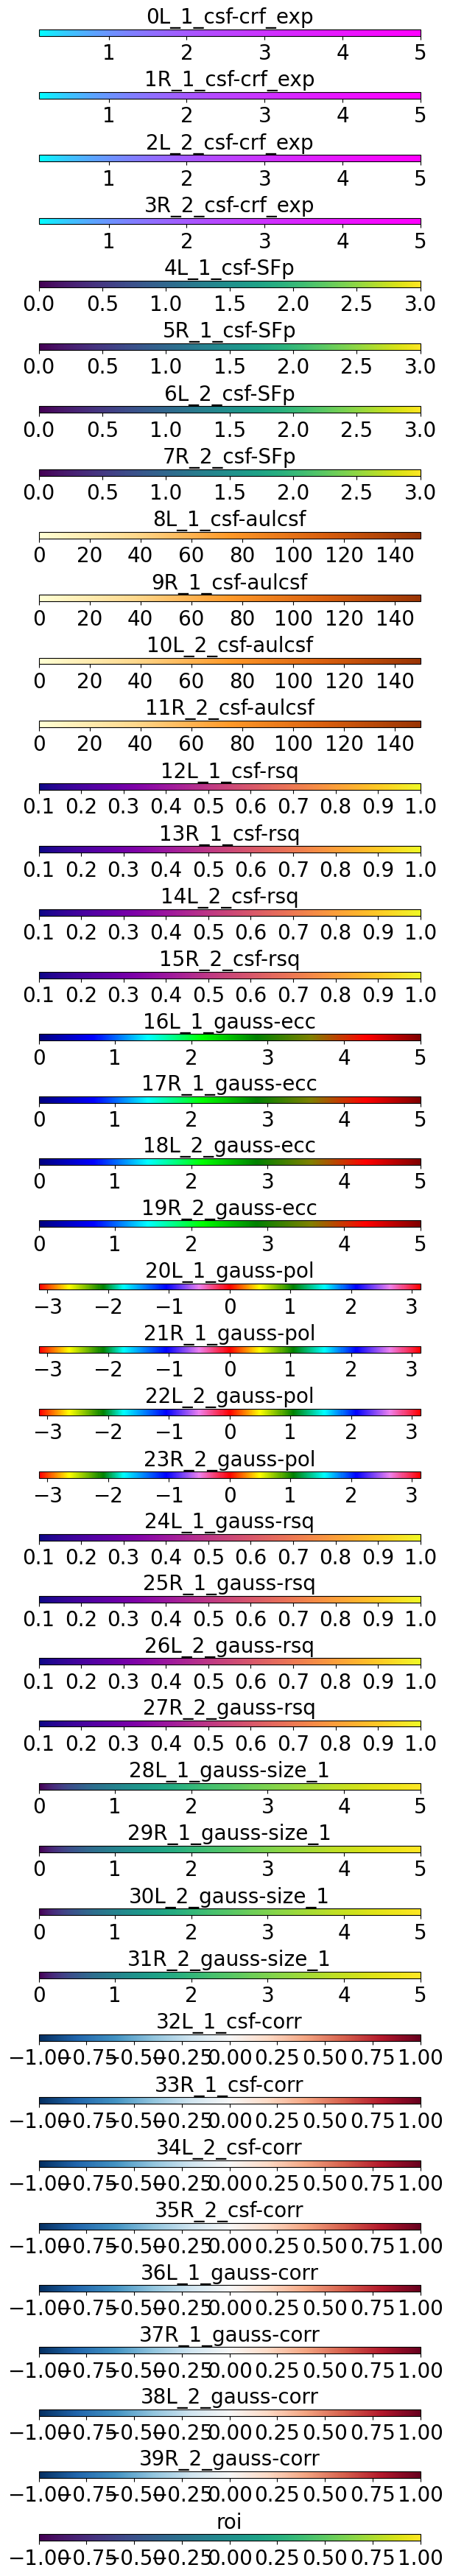

In [305]:
from dag_prf_utils.pycortex import *
# from linescanning.pycortex import *
a = set_ctx_path(
    p='/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/derivatives/pycortex',
)

print(cortex.database.default_filestore)
p_list = ['csf-crf_exp', 'csf-SFp', 'csf-aulcsf', 'csf-rsq', 'gauss-ecc', 'gauss-pol', 'gauss-rsq', 'gauss-size_1', 'csf-corr', 'gauss-corr']     
# p_list = ['csf-SFp', 'csf-aulcsf', 'csf-rsq', 'gauss-ecc', 'gauss-pol', 'gauss-rsq', 'gauss-size_1', 'csf-corr', 'gauss-corr']     
# p_list = ['gauss-ecc', 'gauss-pol', 'gauss-rsq', 'gauss-size_1', 'csf-corr', 'gauss-corr']    
# p_list = ['gauss-rsq']
p_cmap = {
    'crf_exp'   : 'cool_log', 
    'SFp'       : 'viridis',
    'aulcsf'    : 'aulcsf', 
    'rsq'       : 'plasma',
    'ecc'       : 'ecc2', #'ecc2', 
    'pol'       : 'marco_pol',
    'size_1'    : 'viridis_log',
    'CSp'       : 'viridis_log',        
    'sfmax'       : 'viridis_log',
    'corr'      : 'RdBu_r',

}
p_bounds = {
    'SFp'     : [0,3],
    'crf_exp' : [.1, 5],
    'aulcsf'  : [0,150],
    'rsq'     : [0.1,1],
    'ecc'     : [0,5],
    'pol'     : [-np.pi, np.pi],    
    'size_1'   : [0, 5],
    'sfmax'   : [0, 50],
    'CSp'  : [0, 100],
    'corr' : [-1,1],
}
roi_list = ['b14_V1', 'b14_V2', 'b14_V3.', 'b14_V3a', 'b14_V3b', 'b14_LO1', 'b14_LO2'] # 'all']
ses = '1'
order_id = 0
for sub in ['sub-02']: #sub_list:
    sub_pyc_file = opj(pyc_file, sub)
    if not os.path.exists(sub_pyc_file):
        os.mkdir(sub_pyc_file)
    pm = PyctxMaker(
        sub = sub,
        fs_dir = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/derivatives/freesurfer',
        output_dir = sub_pyc_file,
        )
    for p_full in p_list:
        for ses in ['1', '2']:
            for eye in ['L', 'R']:
                p_mod, p_par = p_full.split('-')
                if p_mod=='csf':
                    th = {
                        f'{eye}_{ses}_csf-min-rsq':.1,
                        f'{eye}_{ses}_gauss-min-rsq':.1,
                        f'{eye}_{ses}_gauss-max-ecc':5,
                        }
                else:
                    th = {
                        f'{eye}_{ses}_gauss-min-rsq':.1,
                        f'{eye}_{ses}_gauss-max-ecc':5,
                        }

                surf_name = f'{eye}_{ses}_{p_mod}-{p_par}'
                if p_par=='corr':
                    data = run_corr[sub][f'{eye}_{ses}_{p_mod}']
                    vx_mask = np.ones_like(data, dtype=bool)
                else:
                    data = prf_multi[sub].pd_params[surf_name].to_numpy()
                    vx_mask = prf_multi[sub].return_vx_mask(th)

                pm.add_vertex_obj(
                    data=data, 
                    data_mask=vx_mask,
                    cmap = p_cmap[p_par], 
                    # cmap= None, #if 'corr' in surf_name else p_cmap[p_par], 
                    # use_vertex1d=True, #  if 'corr' in surf_name else False, 
                    vmin=p_bounds[p_par][0], 
                    vmax=p_bounds[p_par][1], 
                    surf_name=f'{order_id:>01}{surf_name}',    
                    under_surf='curv', 
                    # roi_list = 'b14_'
                )
                order_id +=1
                # pm.add_surface(
                #     data=data, 
                #     data_mask=vx_mask,
                #     cmap=p_cmap[p_par], 
                #     vmin=p_bounds[p_par][0], 
                #     vmax=p_bounds[p_par][1], 
                #     surf_name=surf_name,    
                # )
    pm.add_vertex_obj(
        data=np.ones_like(vx_mask), 

        vmin=p_bounds[p_par][0], 
        vmax=p_bounds[p_par][1], 
        surf_name='roi',    
        under_surf='curv', 
        roi_list = roi_list,
    )    
    pm.return_pyc_saver(
        save_cm=False,
        output_dir=sub_pyc_file,
        # viewer=False, 
    )
    # pm.open_fs_surface(pm.surf_list, keep_running=True)
    # # pm.vertex_dict[p_full]
    # # pm.pyc.to_static(filename=f'{sub}_pyc')
    # cortex.webgl.show(pm.vertex_dict['L_1_gauss-corr'])
    bloop        
    break

In [7]:
# Add AREA UN LOG CSF
# load prfpy stim

m = 'csf'
for sub in sub_list:
    prf_obj_list = [] 
    prf_id_list = []
    for ses in ['1', '2']:        
        for eye in ['L', 'R']:    
            task = f'CSF{eye}E'
            # this_AULCSF = add_aulcsf_to_objV2(
            #     prf_obj=prf_multi[sub].prf_obj[f'{eye}_{ses}_{m}'],
                
            # )
            this_AULCSF = add_aulcsf_to_objV2(
                prf_obj=prf_multi[sub].prf_obj[f'{eye}_{ses}_{m}'],
                
            )            
            prf_multi[sub].prf_obj[f'{eye}_{ses}_{m}'].pd_params['AULCSF'] = this_AULCSF.copy()
            # sys.exit()

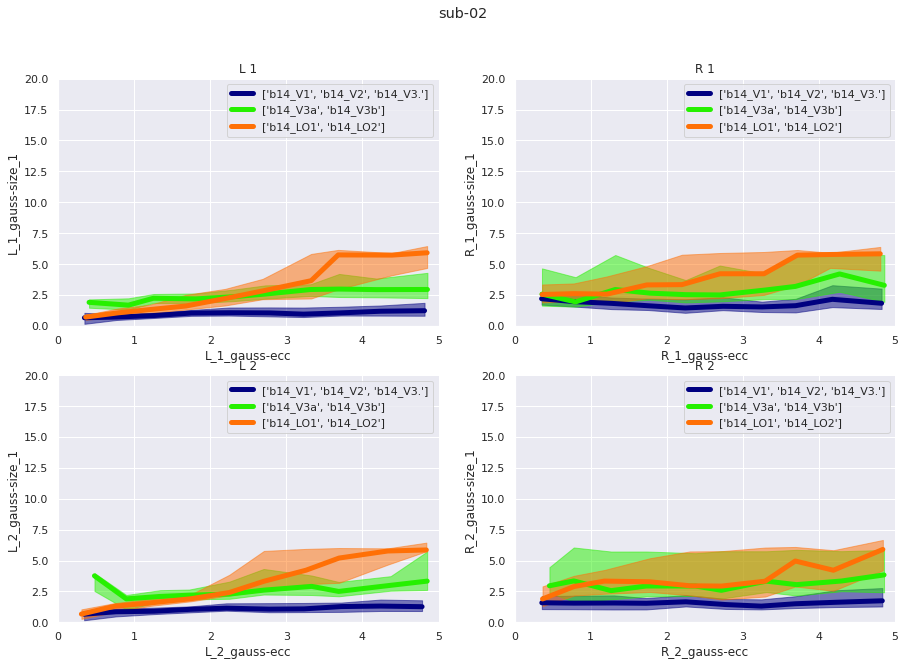

In [88]:
sns.set_theme()

# sns.set_context('paper')
y_param = 'gauss-size_1'
y_lim = [0,20]
roi_list = [['b14_V1', 'b14_V2', 'b14_V3.'], ['b14_V3a', 'b14_V3b'], ['b14_LO1', 'b14_LO2'],] # 'all']
for sub in sub_list:
    fig,ax = plt.subplots(2,2)
    fig.set_size_inches(15,10)
    fig.suptitle(sub)

    for i,roi in enumerate(roi_list):
        this_col = dag_get_col_vals(i, cmap='gist_ncar', vmin=0, vmax=len(roi_list))
        roi_mask = amb_load_roi(sub, roi)

        for i_ses, ses in enumerate(['1','2']):
            for i_eye, eye in enumerate(['L', 'R']):
                # print(ses)
                # print(roi)
                prf_multi[sub].scatter(
                    px=f'{eye}_{ses}_gauss-ecc',
                    py=f'{eye}_{ses}_{y_param}',
                    do_line=True,
                    bins=np.linspace(0,5,11),
                    do_scatter=False,
                    ax=ax[i_ses, i_eye],
                    line_label=roi,
                    th_plus={'roi':roi_mask},
                    line_col = this_col,
                    x_lim=[0,5],
                    y_lim=y_lim,
                    do_bars=False, do_shade=True, err_type='pc-75'

                )
                ax[i_ses, i_eye].set_title(f'{eye} {ses}')
plt.show()                

KeyError: 'L_1_csf'

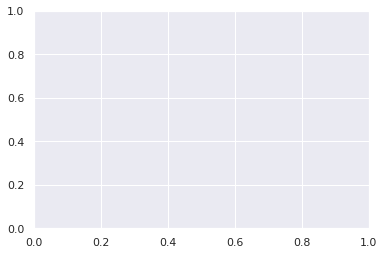

In [89]:
sub = 'sub-02'
roi_mask = amb_load_roi(sub, 'all')
th={
    'L_1_csf-min-rsq':.1, 
    # 'L_2_csf-min-rsq':.1, 
    'R_1_csf-min-rsq':.1, 
    # 'R_2_csf-min-rsq':.1, 
    #
    'L_1_gauss-bound-ecc':[0,50], 
    # 'L_2_gauss-bound-ecc':[0,5], 
    'R_1_gauss-bound-ecc':[0,50], 
    # 'R_2_gauss-bound-ecc':[0,5], 

    'roi':roi_mask
    }
prf_multi[sub].hist(px='L_1_csf-AULCSF', th=th, alpha=0.5)
prf_multi[sub].hist(px='R_1_csf-AULCSF', th=th, alpha=0.5, ax=plt.gca())

In [262]:
for sub in sub_list:
    # prf_multi[sub].add_prf_diff('L_1_gauss', 'L_2_gauss', new_id='diff_L12')
    # prf_multi[sub].add_prf_diff('R_1_gauss', 'R_2_gauss', new_id='diff_R12')
    # prf_multi[sub].add_prf_diff('L_1_gauss', 'R_1_gauss', new_id='diff_L1R1')
    # prf_multi[sub].add_prf_diff('L_2_gauss', 'R_2_gauss', new_id='diff_L2R2')    


    prf_multi[sub].add_prf_diff('L_1_gauss', 'L_2_gauss', new_id='diff_L12g')
    prf_multi[sub].add_prf_diff('R_1_gauss', 'R_2_gauss', new_id='diff_R12g')
    prf_multi[sub].add_prf_diff('L_1_gauss', 'R_1_gauss', new_id='diff_L1R1g')
    prf_multi[sub].add_prf_diff('L_2_gauss', 'R_2_gauss', new_id='diff_L2R2g')        

    prf_multi[sub].add_prf_diff('L_1_csf', 'L_2_csf', new_id='diff_L12c')
    prf_multi[sub].add_prf_diff('R_1_csf', 'R_2_csf', new_id='diff_R12c')
    prf_multi[sub].add_prf_diff('L_1_csf', 'R_1_csf', new_id='diff_L1R1c')
    prf_multi[sub].add_prf_diff('L_2_csf', 'R_2_csf', new_id='diff_L2R2c')        

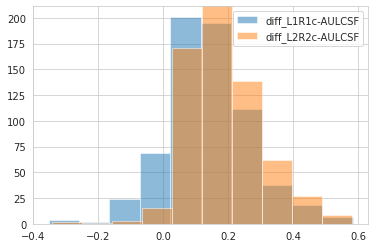

In [263]:
roi_mask = amb_load_roi(sub, 'b14_V1')
th={
    'L_1_csf-min-rsq':.1, 
    'L_2_csf-min-rsq':.1, 
    'R_1_csf-min-rsq':.1, 
    'R_2_csf-min-rsq':.1, 
    #
    # 'R_1_gauss-bound-ecc':[0,5], 
    # 'R_2_gauss-bound-ecc':[0,5], 
    # 'L_1_gauss-bound-ecc':[0,5], 
    # 'L_2_gauss-bound-ecc':[0,5], 

    'roi':roi_mask
    }

prf_multi[sub].rapid_hist(
    ax=plt.gca(), px='diff_L1R1c-AULCSF', alpha=0.5, th=th,#bins=np.linspace(-2,2,10),
)
prf_multi[sub].rapid_hist(
    ax=plt.gca(), px='diff_L2R2c-AULCSF', alpha=0.5, th=th,#bins=np.linspace(-2,2,10),
)
# ax = plt.gca()
# ax.set_xlim(-8,8)
# ax.set_ylim(-8,8)
# ax.plot((0,0), (-8,8), 'k')
# ax.plot((-8,8), (0,0), 'k')
# ax.set_aspect('equal')

In [ ]:
roi_mask = amb_load_roi(sub, 'b14_V1')
th={
    'L_1_csf-min-rsq':.1, 
    'L_2_csf-min-rsq':.1, 
    'R_1_csf-min-rsq':.1, 
    'R_2_csf-min-rsq':.1, 
    #
    # 'R_1_gauss-bound-ecc':[0,5], 
    # 'R_2_gauss-bound-ecc':[0,5], 
    # 'L_1_gauss-bound-ecc':[0,5], 
    # 'L_2_gauss-bound-ecc':[0,5], 

    'roi':roi_mask
    }

prf_multi[sub].rapid_hist(
    ax=plt.gca(), px='diff_L1R1c-AULCSF', alpha=0.5, th=th,#bins=np.linspace(-2,2,10),
)
prf_multi[sub].rapid_hist(
    ax=plt.gca(), px='diff_L2R2c-AULCSF', alpha=0.5, th=th,#bins=np.linspace(-2,2,10),
)
# ax = plt.gca()
# ax.set_xlim(-8,8)
# ax.set_ylim(-8,8)
# ax.plot((0,0), (-8,8), 'k')
# ax.plot((-8,8), (0,0), 'k')
# ax.set_aspect('equal')

In [256]:
amb_load_roi(sub, 'occ').sum()

108077

In [257]:
roi_mask = amb_load_roi(sub, 'all')
th={
    'L_1_gauss-min-rsq':.1, 
    'L_2_gauss-min-rsq':.1, 
    'R_1_gauss-min-rsq':.1, 
    'R_2_gauss-min-rsq':.1, 
    #
    'R_1_gauss-bound-ecc':[0,5], 
    'R_2_gauss-bound-ecc':[0,5], 
    'L_1_gauss-bound-ecc':[0,5], 
    'L_2_gauss-bound-ecc':[0,5], 

    'roi':roi_mask
    }
p_list = ['diff_L1R1-size_1', 'diff_L2R2-size_1']    
pd2plot = pd.DataFrame(prf_multi[sub].return_th_params(p_list, th, th_plus={'roi':roi_mask}))
dag_full_violin(pd2plot) 
# plt.gca().set_title(f'{m} {sub}')
# plt.gca().set_ylabel(p)
plt.gca().set_xlabel('session')
# plt.gca().legend(['Left', 'Right'])
# plt.gca().set_ylim(vval_dict[p])
plt.gcf().set_size_inches(10,10)
dag_update_ax_fontsize(plt.gca(), 20)


KeyError: 'diff_L1R1'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


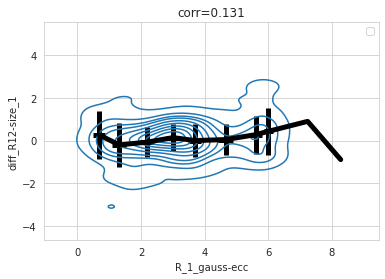

In [174]:
roi_mask = amb_load_roi(sub, 'b14_V1')
prf_multi[sub].rapid_p_corr(
    py='diff_R12-size_1', px='R_1_gauss-ecc', th={'R_1_gauss-min-rsq':.2, 'R_2_gauss-min-rsq':.2, 'roi':roi_mask}, do_kde=True, do_scatter=False, do_line=True
)

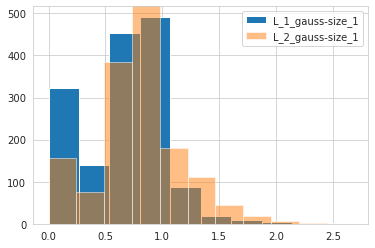

In [195]:
roi_mask = amb_load_roi(sub, 'b14_V1')
th={
    'R_1_gauss-min-rsq':.1, 
    'R_2_gauss-min-rsq':.1, 
    'R_1_gauss-bound-ecc':[0,300], 
    'R_2_gauss-bound-ecc':[0,300], 
    'R_1_gauss-bound-size_1':[0,3], 
    'R_2_gauss-bound-size_1':[0,3],     
    'roi':roi_mask
    }

prf_multi[sub].rapid_hist(
    px='L_1_gauss-size_1', 
    th=th,
)

prf_multi[sub].rapid_hist(
    px='L_2_gauss-size_1',  
    th=th,
    ax=plt.gca(),alpha=0.5

)

# qCSF plots

In [7]:
# # qCSF 
# p_label = ['peakCS', 'peakSF', 'bdwth', 'lowSFtrunc', 'AULCSF']
# for sub in sub_list:
#     print(sub)
#     for eye in ['L', 'R']:    
#         # print(f'Eye = {eye}')
#         for ses in ses_list:
#             # print(f'{ses}')
#             p_list = ''
#             for p in p_label:

#                 # print(f'{p:>10} = {qCSF_info[sub][ses][eye][p]:.3f}')
#                 p_list += f' {qCSF_info[sub][ses][eye][p]:.3f}'
#                 # qCSF_info['L'].keys()
#             print(p_list)
#     print('')

# # Compare CSFs: *  general
# # SFs = qCSF_info['L']['SF_list']
# fig_path = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/amb_code/reports/'

# SFs = np.linspace(.25, 30, 100)
# # [1] qCSF L & R
# for sub in sub_list:
#     for ses in ses_list:
#         plt.figure()
#         plt.title(f'{sub}-{ses}-beh')
#         for eye in ['L', 'R']:
#             b_log_csf = qcsf_curve(
#                 SFs,
#                 qCSF_info[sub][ses][eye]['peakCS'],
#                 qCSF_info[sub][ses][eye]['peakSF'],
#                 qCSF_info[sub][ses][eye]['bdwth'],
#                 qCSF_info[sub][ses][eye]['lowSFtrunc'],
#             )
#             if eye=='L':
#                 col ='r'
#             else:
#                 col='b'
#             plt.plot(np.log10(SFs), b_log_csf, color=col, marker='*', label=f'{eye}')
#             # Also plot max
#             ylim = (0,2.5)
#             this_peakSF = qCSF_info[sub][ses][eye]['peakSF']
#             plt.plot((this_peakSF,this_peakSF), ylim, color=col)
#             plt.legend()

#         plt.savefig(opj(fig_path, f'{sub}_violin', f'qCSF-{sub}-{ses}.svg'))
#         plt.savefig(opj(fig_path, f'{sub}_violin', f'qCSF-{sub}-{ses}.png'))



# violin plots: all

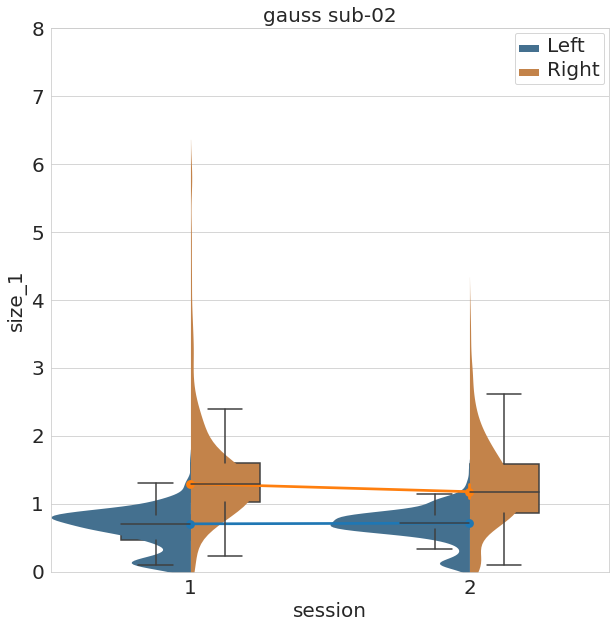

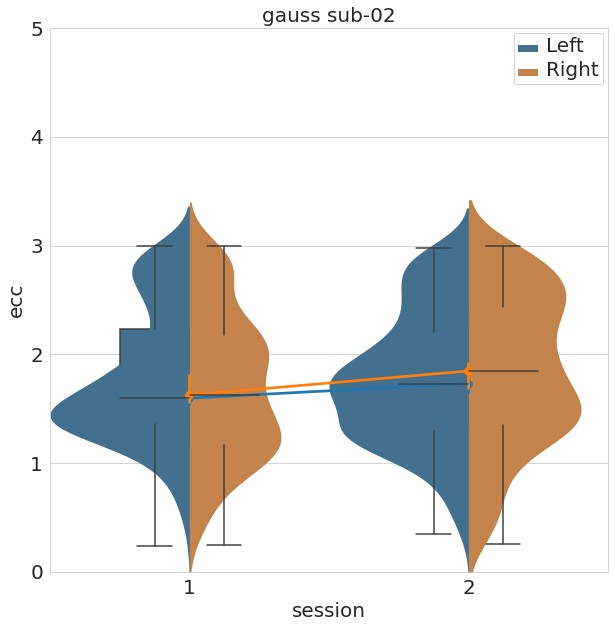

In [130]:
p_list = {
    'gauss' : ['size_1', 'ecc'], #['ecc',  'size_1', 'rsq'],
    # 'csf' : ['AULCSF', 'rsq'] #['width_r', 'sf0', 'maxC', 'sfmax', 'rsq']
}    
vval_dict = {
    'pol': [-3.14, 3.14],
    'ecc': [0,5],
    'size_1': [0,8],
    'rsq': [0,1],
    'width_r': [0,3],
    'sf0' : [0,6],
    'maxC': [0, 200],
    'sfmax': [0, 20],
    'AULCSF': [0,1],
    }

roi = 'b14_V1'    

for sub in sub_list:
    roi_mask = amb_load_roi(sub, roi)
    for m in p_list.keys():
        if m=='csf':
            th = {'min-rsq':.1}
        else:
            th = {'min-rsq':.1, 'max-ecc':5}

        for p in p_list[m]:
            plt.figure()
            task_list = ['L_1', 'L_2', 'R_1', 'R_2']            
            p_list = [f'{i}_{m}-{p}' for i in task_list]
            c_list = [f'{i}_{m}' for i in task_list]            
            th ={}            
            for c in c_list:
                th[f'{c}-min-rsq'] = .1
                if m!='csf':
                    th[f'{c}-bound-ecc'] = [0,3]
            
            pd2plot = pd.DataFrame(prf_multi[sub].return_th_params(p_list, th, th_plus={'roi':roi_mask}))
            dag_half_violin(pd2plot, split_id=['L', 'R'], match_id=['1', '2']) 
            plt.gca().set_title(f'{m} {sub}')
            plt.gca().set_ylabel(p)
            plt.gca().set_xlabel('session')
            plt.gca().legend(['Left', '_', 'Right'])
            plt.gca().set_ylim(vval_dict[p])
            plt.gcf().set_size_inches(10,10)
            dag_update_ax_fontsize(plt.gca(), 20)
            

            # plt.figure()    
            # plt.gcf().suptitle(f'{sub} {m} {p}')
            # plt.gca().set_ylim(vval_dict[p])
            # plt.gcf().set_size_inches(10,10)
            # plt.gcf().set_tight_layout('tight')
            # dag_update_fig_fontsize(plt.gcf(), 30)


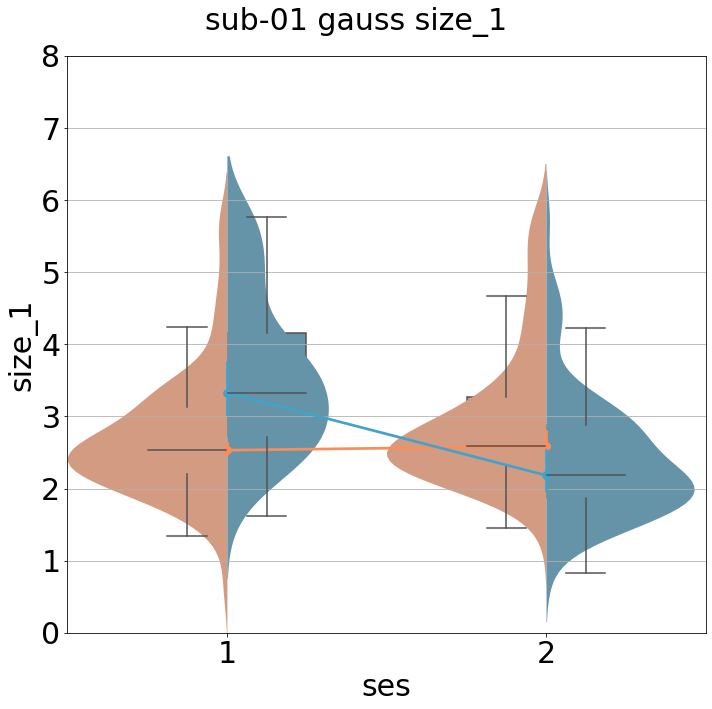

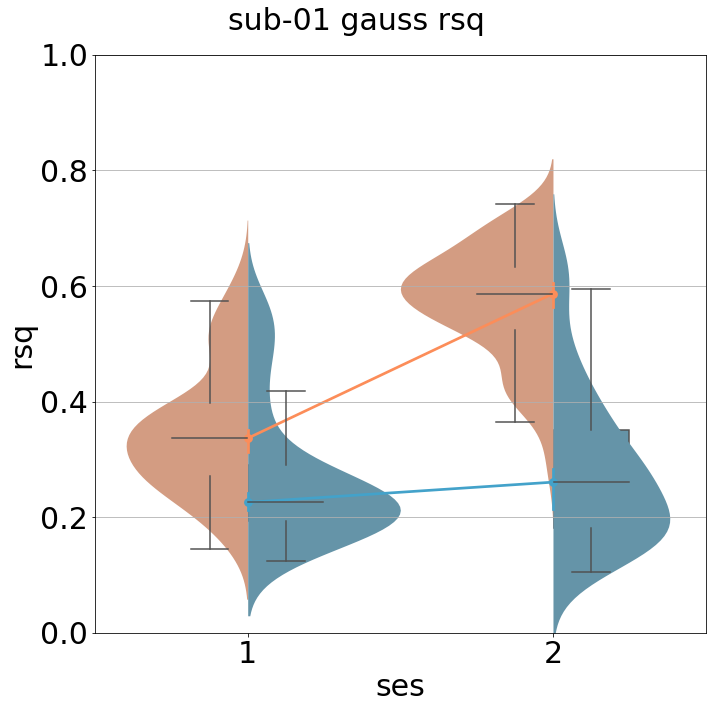

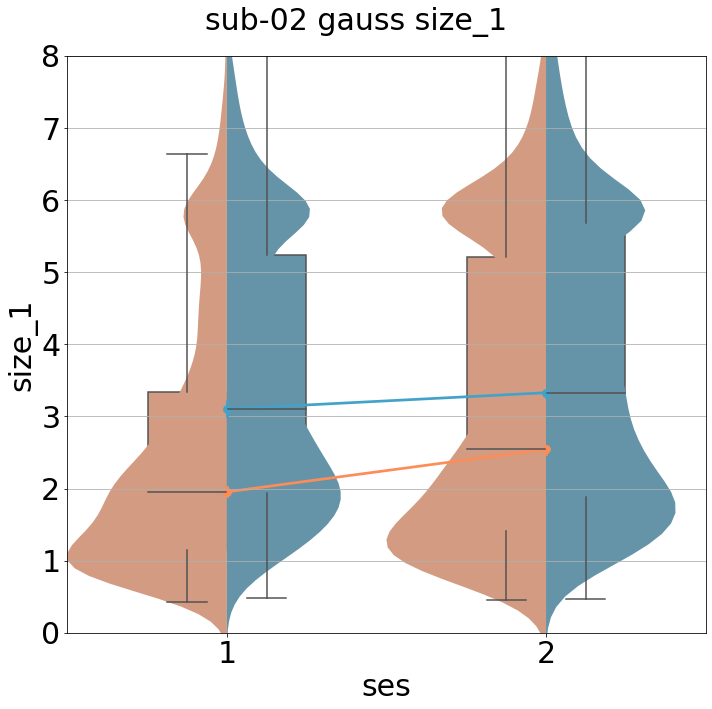

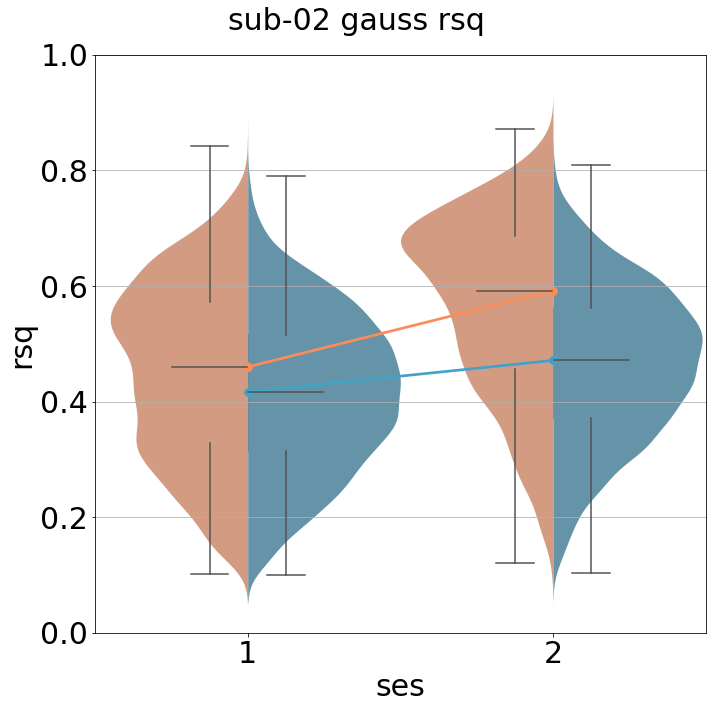

In [64]:

# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

def LE_RE_ses_violin(prf_multi, model, param, th=None, do_plot=True,do_matched=True, ):        
    if th is None:
        th = {'min-rsq':.1, 'max-ecc':5}
    # prfx = Prf1T1Mx2(prf_obj1=prfL, prf_obj2=prfR, id1='L', id2='R')
    if do_matched:
        vx_mask = prf_multi.return_vx_mask(th)
    p_dict = {}
    p_dict[param] = []
    p_dict['eye'] = []
    p_dict['ses'] = []
    if do_matched:
        p_dict['vx_id'] = []
    # p_dict['model'] = []
    for eye in ['L', 'R']:
        for ses in ['1', '2']:
            if do_matched:
                this_vx_mask = vx_mask
            else:
                this_vx_mask = prf_multi.prf_obj[f'{eye}_{ses}_{model}'].return_vx_mask(th)
            this_p = prf_multi.prf_obj[f'{eye}_{ses}_{model}'].pd_params[param][this_vx_mask]
            p_dict[param].append(this_p)
            p_dict['eye'].append([eye]*len(this_p))
            p_dict['ses'].append([ses]*len(this_p))
            if do_matched:
                p_dict['vx_id'].append(np.arange(len(this_p)))

    for key in p_dict.keys():                                                              
        p_dict[key] = np.concatenate(p_dict[key])                                          
    p_PD = pd.DataFrame(p_dict) 
    # if do_matched:
    #     formula = f'{param} ~ C(eye) + C(ses) + C(eye):C(ses)'
    #     model = ols(formula, data=p_PD).fit()
    #     anova_table = sm.stats.anova_lm(model, typ=2)
    #     print(anova_table)   
    # else:

    if do_plot:                                                        
        sns.violinplot(                                                                        
            x="ses", y=param, hue="eye",                                
            data=p_PD, palette=[plot_cols["LE"], plot_cols["RE"]],                     
            width=1, linewidth=0, split=True, inner=None,saturation=0.5)                                     
        sns.boxplot(x="ses", y=param,                                            
                    hue="eye", palette=[plot_cols["LE"], plot_cols["RE"]],        
                    data=p_PD, showfliers = False, width=.5, saturation=0.5)
        sns.pointplot(
            x="ses", y=param, 
            hue="eye", palette=[plot_cols["LE"], plot_cols["RE"]],        
            estimator=np.median,
            data=p_PD)                               
        # # sns.despine(offset=10, trim=True)                                                    
        plt.gca().grid(True, which='both', axis="y")  
        plt.gca().get_legend().remove()



        # # plt.legend('off')                                         
        # plt.gca().set_ylim(0,5)                                                               
        # plt.gca().set_title(title)                                                               
        # y_max = plt.gca().get_ylim()[-1]
        # plt.gcf().set_size_inches(10,4)
        # dag_update_ax_fontsize(plt.gca(), 15)
        # for i,p in enumerate(roi_pval):
        #     plt.gca().text(i,y_max*.8,p,  color='red', fontsize=40)
        # # plt.gca().set_title(f'Rsq for {sub} (fit on AS0, test on AS1,AS2, including scotoma)') 
        
    return p_PD

p_list = {
    'gauss' : ['size_1', 'rsq'], #['ecc',  'size_1', 'rsq'],
    # 'csf' : ['AULCSF', 'rsq'] #['width_r', 'sf0', 'maxC', 'sfmax', 'rsq']
}    
vval_dict = {
    'pol': [-3.14, 3.14],
    'ecc': [0,5],
    'size_1': [0,8],
    'rsq': [0,1],
    'width_r': [0,3],
    'sf0' : [0,6],
    'maxC': [0, 200],
    'sfmax': [0, 20],
    'AULCSF': [0,1],
    }

fig_path = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/amb_code/reports/'
for sub in sub_list:
    for m in p_list.keys():
        if m=='csf':
            th = {'min-rsq':.1}
        else:
            th = {'min-rsq':.1, 'max-ecc':5}

        for p in p_list[m]:
            plt.figure()    
            this_PD = LE_RE_ses_violin(
                prf_multi=prf_multi[sub], 
                model=m, 
                param=p, do_matched=True, th={'all-min-rsq':.1})
            plt.gcf().suptitle(f'{sub} {m} {p}')
            plt.gca().set_ylim(vval_dict[p])
            plt.gcf().set_size_inches(10,10)
            plt.gcf().set_tight_layout('tight')
            dag_update_fig_fontsize(plt.gcf(), 30)
            # plt.savefig(opj(fig_path, f'{sub}_simple', f'ALL-V-{m}_{p}.svg'))
            # plt.savefig(opj(fig_path, f'{sub}_simple', f'ALL-V-{m}_{p}.png'))
            # bloop

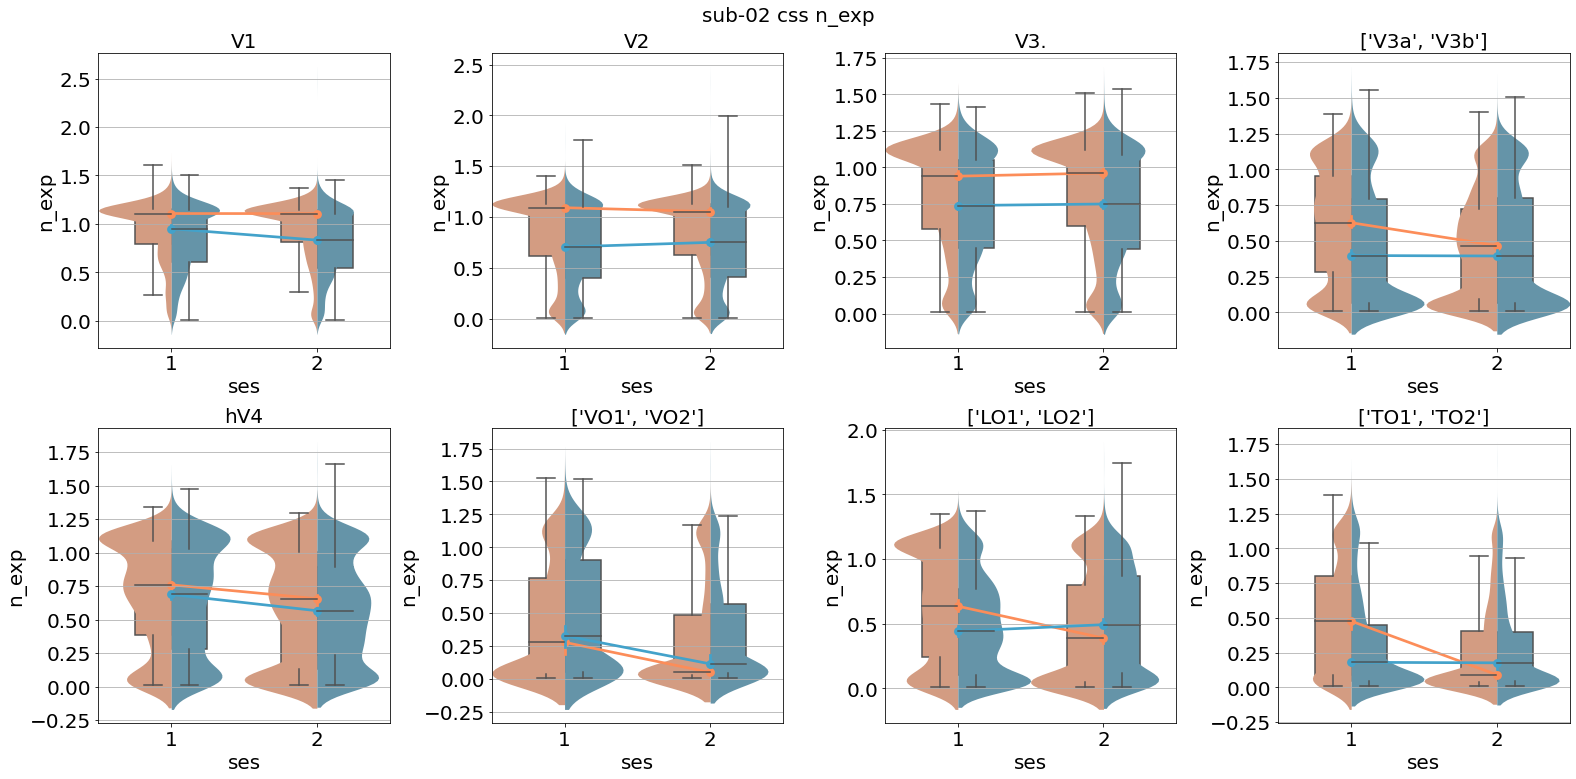

In [65]:
sub = 'sub-02'
m = 'css'
p = 'n_exp'
b14_dict = {
    1:  'V1',   2: 'V2',    3: 'V3',    4: 'hV4',
    5: 'VO1',   6:  'VO2',  7: 'LO1',   8: 'LO2',
    9: 'TO1',   10: 'TO2',  11: 'V3b',  12: 'V3a'}

early_v = ['b14_V1', 'b14_V2', 'b14_V3.']
# later_v = ['b14_V1', 'b14_V2', 'b14_V3.']
roi_list = ['b14_V1', 'b14_V2'] # ['LO1', 'LO2']#['benson', 'b14_V3a', 'b14_V3b']
roi_list = ['V1','V2','V3.',['V3a', 'V3b'], 'hV4',['VO1','VO2'],['LO1','LO2'],['TO1','TO2']]
fig = plt.figure()
nrows = 2
ncols = 4
for i_roi, roi in enumerate(roi_list):
    ax = fig.add_subplot(nrows, ncols, i_roi+1)
    roi_mask = amb_load_roi(sub, roi)
    th = {'min-rsq':.1, 'roi':roi_mask, }
    if m=='gauss':
        th = {**th, 'max-ecc':5}
    if m=='csf':
        th = {**th, 'min-maxC':1}
    this_PD = LE_RE_ses_violin(
        prf_multi=prf_multi[sub], 
        model=m, 
        param=p, do_matched=False, th=th)
    if p in vval_dict.keys():
        plt.gca().set_ylim(vval_dict[p])
    plt.gca().set_title(roi)
plt.gcf().suptitle(f'{sub} {m} {p}')
plt.gcf().set_size_inches(22,11)
plt.gcf().set_tight_layout('tight')
dag_update_fig_fontsize(plt.gcf(), 20)

# 4 x 4 (1 sub at a time) ses, eye kde plots

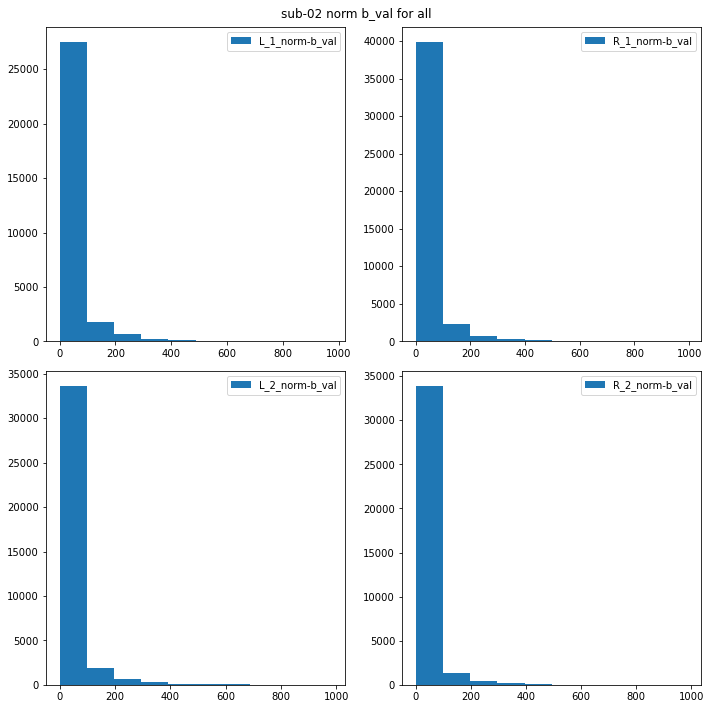

In [95]:
sub = 'sub-02'
m = 'norm'
pid = 'b_val'
roi = 'all'

roi_mask = amb_load_roi(sub, roi)
fig, ax = plt.subplots(2,2)
fig.suptitle(f'{sub} {model} {pid} for {roi}')


for ix,ses in enumerate(['1', '2']):
    for iy,eye in enumerate(['L', 'R']):
        prf_multi[sub].rapid_hist(
            ax=ax[ix,iy],
            px=f'{eye}_{ses}_{m}-{pid}'
            # py=f'{eye}_{ses}_{m}-{pid}'
        )

plt.gcf().set_size_inches(10,10)
plt.gcf().set_tight_layout('tight')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


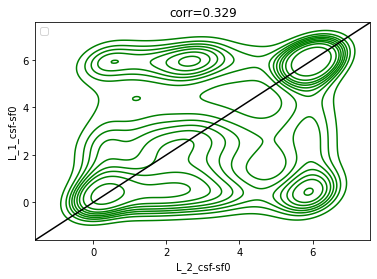

In [92]:
roi_mask = amb_load_roi(sub, 'all')#['b14_V1', 'b14_V2', 'b14_V3.'])
prf_multi[sub].rapid_p_corr(
    ax=plt.gca(),
    py=f'L_1_csf-sf0',
    px=f'L_2_csf-sf0', 
    do_id_line=True, 
    do_kde=True, 
    do_scatter=False, 
    th_plus={'roi':roi_mask, 'L_1_gauss-bound-ecc':[.1,5], 'L_2_gauss-bound-ecc':[.1,5]},
    dot_col='g'
)

# prf_multi[sub].rapid_p_corr(
#     ax=plt.gca(),
#     py=f'L_1_csf-sf0',
#     px=f'L_2_csf-sf0', 
#     do_id_line=True, 
#     do_kde=True, 
#     do_scatter=False, 
#     th_plus={'roi':roi_mask, 'L_1_gauss-bound-ecc':[5,10], 'L_2_gauss-bound-ecc':[5,10]},
#     dot_col='r'
# )

In [100]:
a = {}
for i in a.keys():
    print(i)

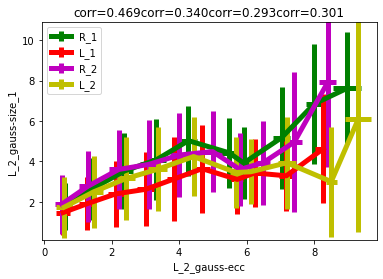

In [59]:

prf_multi[sub].rapid_p_corr(
    ax=plt.gca(),
    py=f'R_1_gauss-size_1',
    px=f'R_1_gauss-ecc', do_id_line=False, do_kde=False, do_scatter=False, th_plus={'roi':roi_mask}, do_line=True, 
    line_col='g',line_label='R_1'
)
prf_multi[sub].rapid_p_corr(
    ax=plt.gca(),
    py=f'L_1_gauss-size_1',
    px=f'L_1_gauss-ecc', do_id_line=False, do_kde=False, do_scatter=False, th_plus={'roi':roi_mask}, do_line=True, 
    line_col='r',line_label='L_1'
)



prf_multi[sub].rapid_p_corr(
    ax=plt.gca(),
    py=f'R_2_gauss-size_1',
    px=f'R_2_gauss-ecc', do_id_line=False, do_kde=False, do_scatter=False, th_plus={'roi':roi_mask}, do_line=True, 
    line_col='m',line_label='R_2'
)
prf_multi[sub].rapid_p_corr(
    ax=plt.gca(),
    py=f'L_2_gauss-size_1',
    px=f'L_2_gauss-ecc', do_id_line=False, do_kde=False, do_scatter=False, th_plus={'roi':roi_mask}, do_line=True, 
    line_col='y',line_label='L_2'
)

plt.legend()
# plt.gcf().set_size_inches(10,10)
# plt.gcf().set_tight_layout('tight')
# plt.gca().set_aspect('equal')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


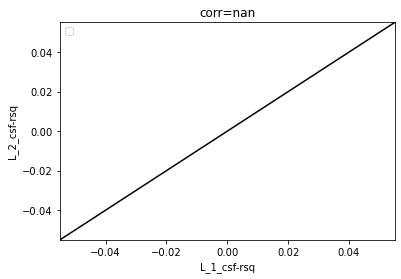

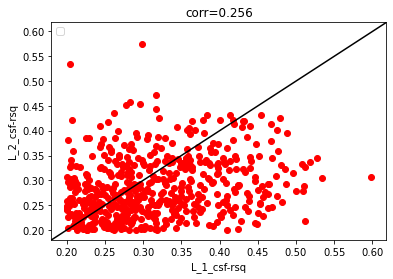

In [261]:

m1 = 'L_1_csf'
m2 = 'L_2_csf'
p1 = 'rsq'
p2 = 'rsq'
th_plus = {
    # f'{m2}-min-maxC': 1    
}
roi ='b14_V1'
for sub in sub_list:
    roi_mask = amb_load_roi(sub, roi)
    th = {
        f'{m1}-min-rsq':.2,
        f'{m2}-min-rsq':.2,        
        'roi' : roi_mask,
        **th_plus,
        
    }
    if p1==p2:
        do_id_line = True
    else:
        do_id_line = False
    
    plt.figure()
    prf_multi[sub].rapid_p_corr(
        f'{m1}-{p1}', f'{m2}-{p2}', do_line=False, th=th,
        do_id_line=do_id_line,do_kde=False, do_scatter=True, dot_col='r'
    )

# np.log10(1e-10000)
# 1e-5 * 10


<AxesSubplot:>

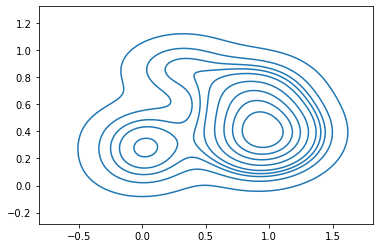

In [249]:
sns.kdeplot(
    np.random.random(10), np.random.random(10)
)

In [222]:
np.log10(10)

1.0

# ROI violin plots

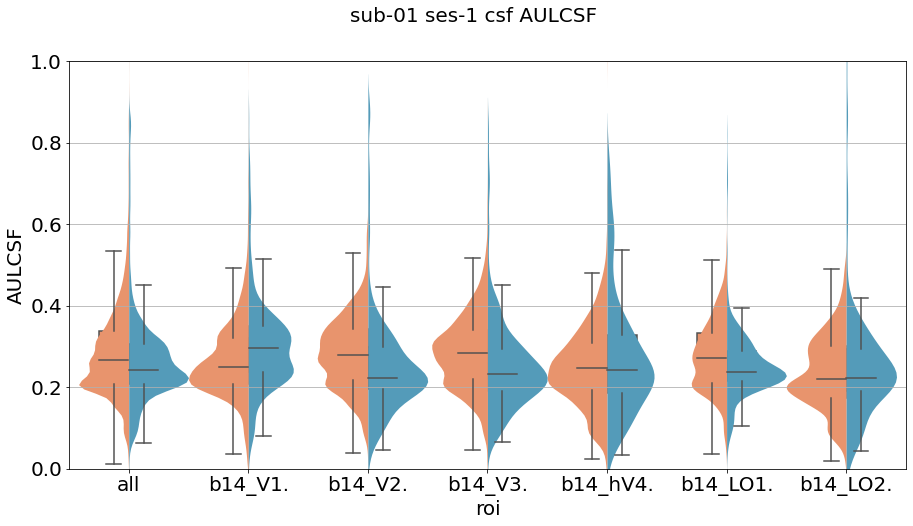

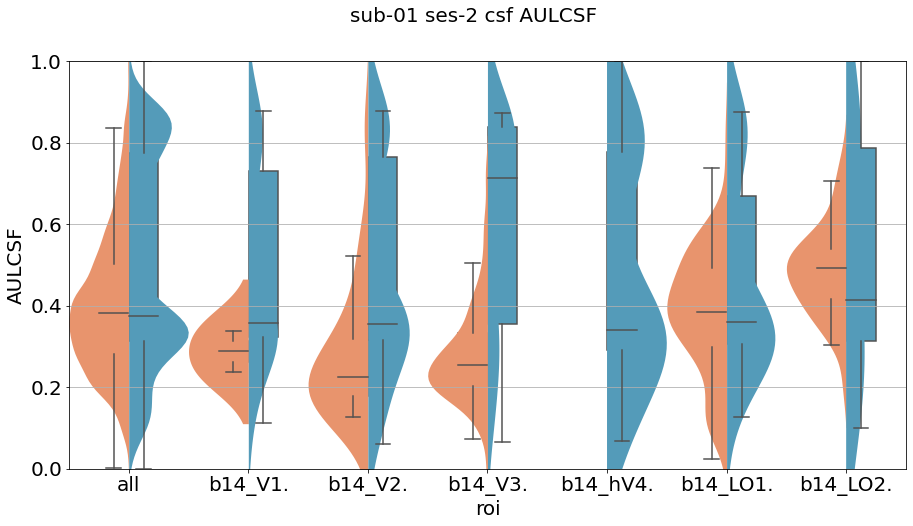

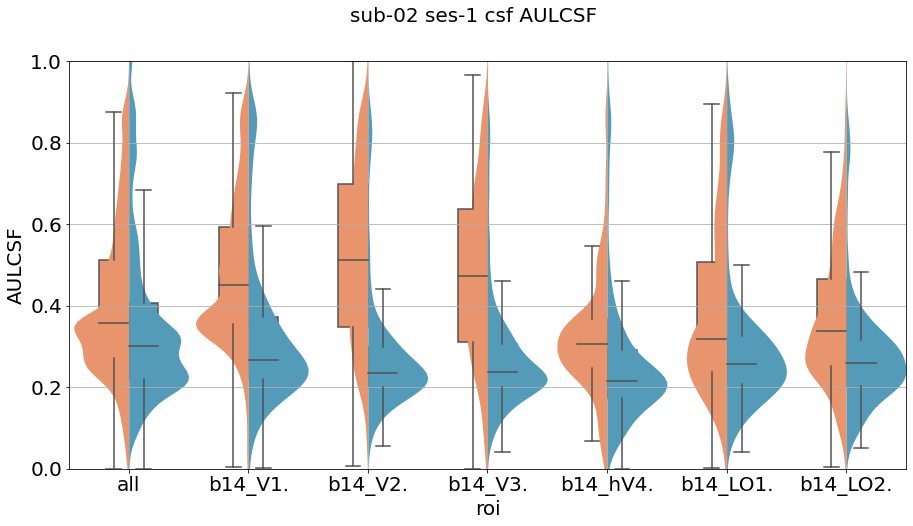

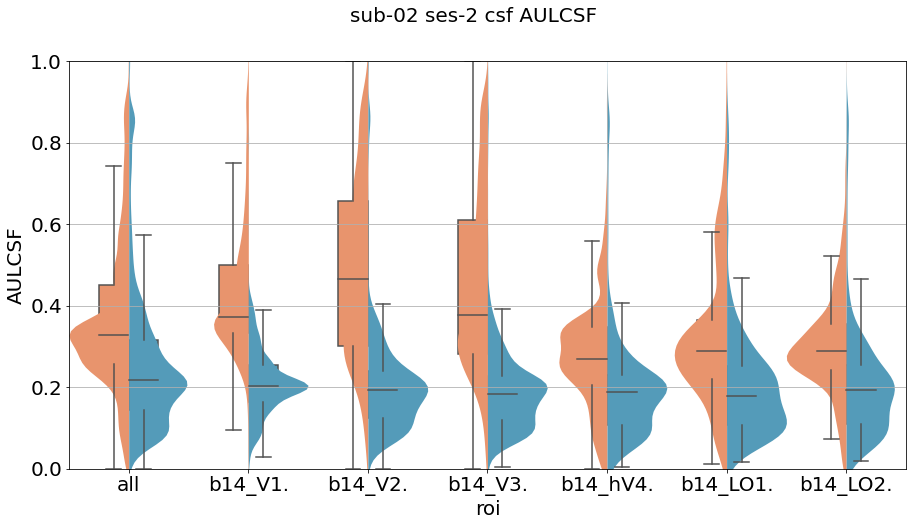

In [66]:
# roi_list = ['all', 'v1custom', 'v2custom', 'v3custom','v3abcustom', 'LOcustom']
def amb_roi_violin(sub, prf_multi, ses, model, param, roi_list, th):        
    p_dict = {}
    p_dict[param] = []
    p_dict['eye'] = []
    p_dict['roi'] = []
    # roi_pval = []
    for roi in roi_list:
        # this_mod_stats = []
        for eye in ['L', 'R']:
            vx_mask  = prf_multi.prf_obj[f'{eye}_{ses}_{model}'].return_vx_mask(th)
            vx_mask &= amb_load_roi(sub, roi)
            this_p = prf_multi.prf_obj[f'{eye}_{ses}_{model}'].pd_params[param][vx_mask].to_numpy()
            p_dict[param].append(this_p)            
            p_dict['roi'].append([roi]*len(this_p))
            p_dict['eye'].append([eye]*len(this_p))
            # this_mod_stats.append(this_p)
        
        # roi_stats = stats.ttest_ind(this_mod_stats[0], this_mod_stats[1])
        # if (roi_stats.pvalue*len(roi_list))<0.01:
        #     roi_pval.append('*')
        # else:
        #     roi_pval.append('')

    for key in p_dict.keys():                                                              
        p_dict[key] = np.concatenate(p_dict[key])                                          
    p_PD = pd.DataFrame(p_dict)                                                            
    sns.violinplot(                                                                        
        x="roi", y=param, hue="eye",                                
        data=p_PD, palette=[plot_cols["LE"], plot_cols["RE"]],                     
        width=1, linewidth=0, split=True, inner=None,)                                     
    sns.boxplot(x="roi", y=param,                                            
                hue="eye", palette=[plot_cols["LE"], plot_cols["RE"]],
                data=p_PD, showfliers = False, width=.5)                               
    # sns.despine(offset=10, trim=True)                                                    
    plt.gca().grid(True, which='both', axis="y")  
    plt.gca().get_legend().remove()
    # plt.legend('off')                                         
    # plt.gca().set_ylim(0,5)                                                               
    # plt.gca().set_title(title)                                                               
    # y_max = plt.gca().get_ylim()[-1]
    # plt.gcf().set_size_inches(10,4)
    dag_update_ax_fontsize(plt.gca(), 15)
    # for i,p in enumerate(roi_pval):
    #     plt.gca().text(i,y_max*.8,p,  color='red', fontsize=40)
    # plt.gca().set_title(f'Rsq for {sub} (fit on AS0, test on AS1,AS2, including scotoma)') 

    return None

roi_list = ['all', 'b14_V1.','b14_V2.','b14_V3.','b14_hV4.', 'b14_LO1.','b14_LO2.']
th = {'min-rsq':.1}


p_list = {
    # 'gauss' : ['ecc',  'size_1', 'rsq'],
    'csf' : ['AULCSF']#, 'sf0', 'maxC', 'sfmax', 'rsq']
    # 'csf': ['size_ratio'],
}    
vval_dict = {
    'pol': [-3.14, 3.14],
    'ecc': [0,5],
    'size_1': [0,8],
    'rsq': [0,1],
    'width_r': [0,3],
    'sf0' : [0,6],
    'maxC': [0, 200],
    'sfmax': [0, 20],
    'AULCSF': [0, 1],
    }
fig_path = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/amb_code/reports/'
for sub in sub_list:
    for m in p_list.keys():
        for p in p_list[m]:
            for ses in ['1', '2']:
                if m!='csf':
                    th={'min-rsq':.1, 'max-ecc':5}
                else:
                    th={'min-rsq':.1, 'min-maxC':1}
                plt.figure()    
                amb_roi_violin(
                    sub, 
                    prf_multi=prf_multi[sub], 
                    ses=ses,
                    model=m, 
                    param=p, roi_list=roi_list, th=th)
                plt.gcf().suptitle(f'{sub} ses-{ses} {m} {p}')
                if p in vval_dict.keys():
                    plt.gca().set_ylim(vval_dict[p])
                plt.gcf().set_size_inches(15,7.5)
                dag_update_fig_fontsize(plt.gcf(), 20)
                # plt.savefig(opj(fig_path, f'{sub}_violin', f'{sub}_ROI_{ses}_{m}_{p}.svg'))
                # plt.savefig(opj(fig_path, f'{sub}_violin', f'{sub}_ROI_{ses}_{m}_{p}.png'))
                # bloop

# Eccentricity plots

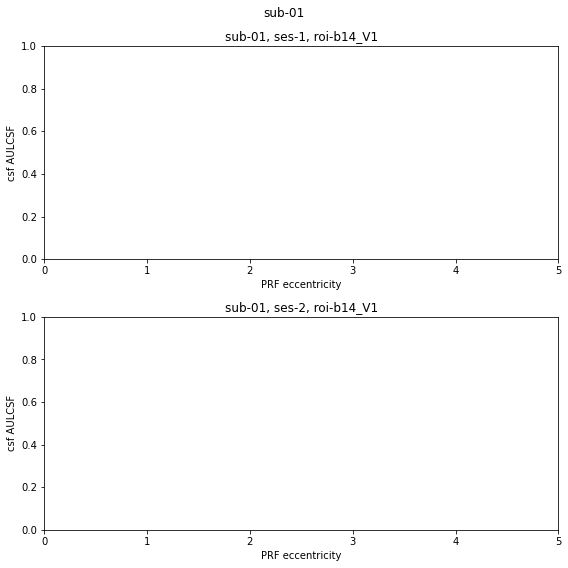

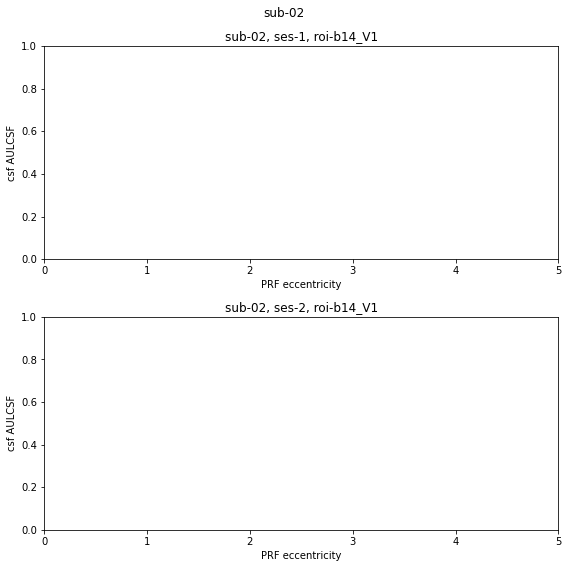

In [68]:
# 1:  'V1',   2: 'V2',    3: 'V3',    4: 'hV4',
# 5: 'VO1',   6:  'VO2',  7: 'LO1',   8: 'LO2',
# 9: 'TO1',   10: 'TO2',  11: 'V3b',  12: 'V3a'}
# ecc plots
m2 = 'csf'
p2 = 'AULCSF'
roi = 'b14_V1' #['b14_V1', 'b14_V2', 'b14_V3.', 'b14_V3a']
xlim = [0,5]
ylim = None#[0,1]


max_ecc = 5
min_rsq = .1
for sub in sub_list:
    fig, ax = plt.subplots(2,1)
    fig.set_size_inches(8,8)
    fig.set_tight_layout('tight')
    fig.suptitle(sub)
    roi_mask = amb_load_roi(sub, roi)
    for i_ses,ses in enumerate(['1', '2']):        
        for eye in ['L', 'R']:
            eye_ses = f'{eye}_{ses}'
            th = {
                f'{eye_ses}_gauss-min-rsq':min_rsq,
                f'{eye_ses}_gauss-max-ecc':max_ecc,
                f'{eye_ses}_{m2}-min-rsq':min_rsq,
                'roi':roi_mask,
            }
            try:
                prf_multi[sub].rapid_p_corr(
                    f'{eye_ses}_gauss-ecc',
                    f'{eye_ses}_{m2}-{p2}',
                    th=th, line_col=plot_cols[f'{eye}E'], ax=ax[i_ses],
                    line_label=eye, bins=np.linspace(0,5,6),
                    do_line=True, do_scatter=False, 
                )
            except:
                pass
            ax[i_ses].set_title(f'{sub}, ses-{ses}, roi-{roi}')
            ax[i_ses].set_xlabel(f'PRF eccentricity')
            ax[i_ses].set_ylabel(f'{m2} {p2}')
            ax[i_ses].set_xlim(xlim)
            ax[i_ses].set_ylim(ylim)
        # plt.savefig(opj(fig_path, f'{sub}_simple', f'ecc_{ses}_{m}_{p2}_{roi}.svg'))
        # plt.savefig(opj(fig_path, f'{sub}_simple', f'ecc_{ses}_{m}_{p2}_{roi}.png'))




## Ecc plots by ROI

In [ ]:
# roi_list = ['V1','V2','V3','hV4', 'LO1','LO2']
# # ecc plots
# m2 = 'gauss'
# p2 = 'size_1'
# roi = 'all'
# xlim = [0,5]
# ylim = [0,10]


# max_ecc = 5
# min_rsq = .1
# for sub in ['sub-02']:
#     for i_roi, roi in enumerate(roi_list):
#         fig, ax = plt.subplots(2,1)
#         fig.set_size_inches(8,8)
#         fig.set_tight_layout('tight')
#         fig.suptitle(sub)
#         roi_mask = amb_load_roi(sub, f'b14_{roi}.')
#         this_col = {}
#         # this_col['L'] = dag_get_col_vals(i_roi, 'Reds', vmin=0, vmax=len(roi_list))
#         # this_col['R'] = dag_get_col_vals(i_roi, 'Blues', vmin=0, vmax=len(roi_list))
#         this_col['L'] = plot_cols['LE']
#         this_col['R'] = plot_cols['RE']        
#         for i_ses,ses in enumerate(['1', '2']):        
#             for eye in ['L', 'R']:
#                 eye_ses = f'{eye}_{ses}'
#                 th = {
#                     f'{eye_ses}_gauss-min-rsq':min_rsq,
#                     f'{eye_ses}_gauss-max-ecc':max_ecc,
#                     f'{eye_ses}_{m2}-min-rsq':min_rsq,
#                     'roi':roi_mask,
#                 }

#                 prf_multi[sub].rapid_p_corr(
#                     f'{eye_ses}_gauss-ecc',
#                     f'{eye_ses}_{m2}-{p2}',
#                     th=th, line_col=this_col[eye], ax=ax[i_ses],
#                     line_label=f'{eye}-{roi}',
#                     do_line=True, do_scatter=True, dot_col=this_col[eye] 
#                 )
#                 ax[i_ses].set_title(f'{sub}, ses-{ses}, roi-{roi}')
#                 ax[i_ses].set_xlabel(f'PRF eccentricity')
#                 ax[i_ses].set_ylabel(f'{m2} {p2}')
#                 ax[i_ses].set_xlim(xlim)
#                 ax[i_ses].set_ylim(ylim)
#                 ax[i_ses].legend('')




In [ ]:
# # Ses vs eye ...
# model = 'csf'
# param = f'sf0'
# prf_cols = {
#     'L_1':'#2166ac',
#     'R_1':'#b2182b',
#     'L_2':'#31a354',
#     'R_2':'#8c510a',
# }
# for sub in sub_list:
#     fig, ax = plt.subplots(4,1)
#     fig.set_size_inches(7,12)
#     fig.set_tight_layout('tight')
#     fig.suptitle(sub)
#     for i,ses in enumerate(['1', '2']):
        
#         for eye in ['L', 'R']:
#             eye_ses = f'{eye}_{ses}'
#             vx_mask = prf_multi[sub].return_vx_mask(
#                 {f'{eye_ses}_{model}-min-rsq':.1}
#             )
#             x = prf_multi[sub].prf_obj[f'{eye_ses}_{model}'].pd_params[param][vx_mask]
#             ax[i].hist(x, color=prf_cols[eye_ses], label=eye_ses, alpha=0.6)
#         ax[i].legend()
#         ax[i].set_xlabel(param)


#     for i,eye in enumerate(['L', 'R']):
#         for _,ses in enumerate(['1', '2']):
        
#             eye_ses = f'{eye}_{ses}'
#             vx_mask = prf_multi[sub].return_vx_mask(
#                 {f'{eye_ses}_{model}-min-rsq':.1}
#             )
#             x = prf_multi[sub].prf_obj[f'{eye_ses}_{model}'].pd_params[param][vx_mask]
#             ax[i+2].hist(x, color=prf_cols[eye_ses], label=eye_ses, alpha=0.9)
#         ax[i+2].legend()
#         ax[i+2].set_xlabel(param)



# Time series 

In [112]:
real_tc = {}
pred_tc = {}
pred_tc = {}

for sub in sub_list:
    real_tc[sub] = {}    
    pred_tc[sub] = {}
    pred_tc[sub] = {}

    for ses in ['1', '2']:
        real_tc[sub][ses] = {}    
        pred_tc[sub][ses] = {}
        pred_tc[sub][ses] = {}        

        real_tc[sub][ses] = amb_load_real_tc(sub=sub, task_list=['pRFLE', 'pRFRE', 'CSFLE', 'CSFRE'], ses=f'ses-{ses}')
        pred_tc[sub][ses] = amb_load_pred_tc(sub=sub, task_list=['pRFLE', 'pRFRE'], model_list='gauss', ses=f'ses-{ses}')
        pred_tc[sub][ses] |= amb_load_pred_tc(sub=sub, task_list=['CSFRE', 'CSFLE'], model_list='csf', ses=f'ses-{ses}')


In [201]:
sub = 'sub-02'
ses = '1'
eye = 'L'
m = 'csf'
task = f'CSF{eye}E'.upper()


this_amb_plotter = AmbPlotter(
    sub=sub, 
    real_tc=real_tc[sub][ses][task], 
    csf_params = prf_multi[sub].prf_obj[f'{eye}_{ses}_{m}'].prf_params_np
)

all_good_fits  = np.where(this_amb_plotter.return_vx_mask({'min-rsq':.1,  'min-maxC':1}))[0]

In [202]:
this_amb_plotter.pd_params['log10_sfmax'][all_good_fits].min()

-0.32845699474073164

0.0
0.14770620424146041
0.0
0.2545230232345526
0.0
0.9718060670575384
0.0
0.6631510551931041
0.0
0.37061082458717926
0.0
0.5816446287558745
0.0
0.6677986170196837
0.0
0.21770603739092131
0.0
0.48193935901788676
0.0
0.5220511123199921


<Figure size 432x288 with 0 Axes>

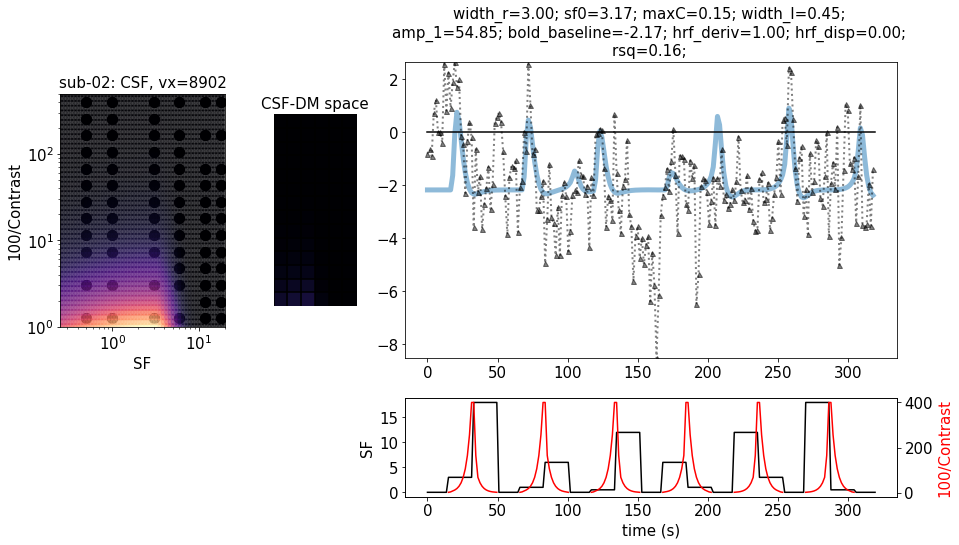

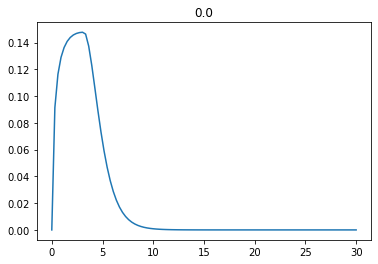

<Figure size 432x288 with 0 Axes>

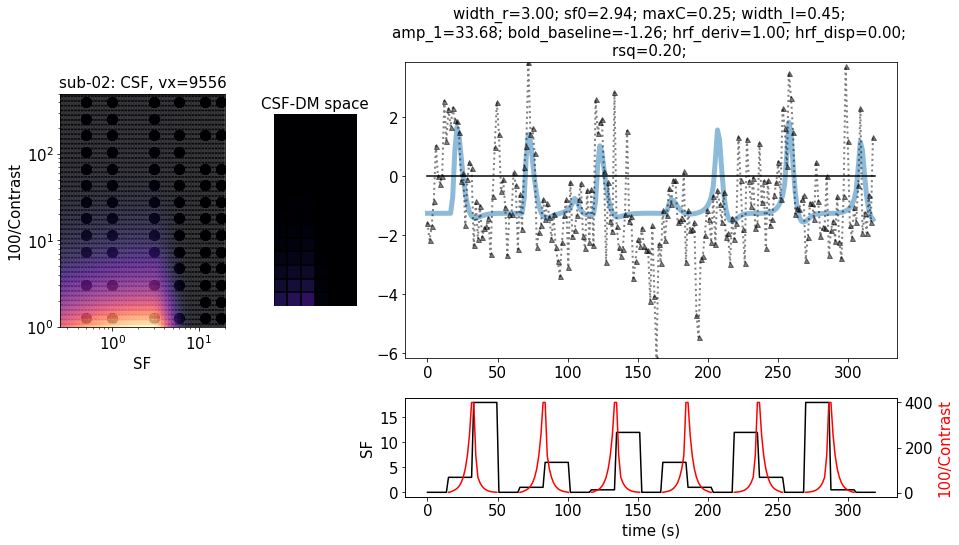

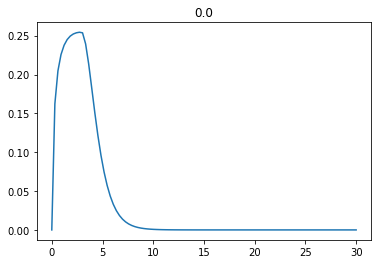

<Figure size 432x288 with 0 Axes>

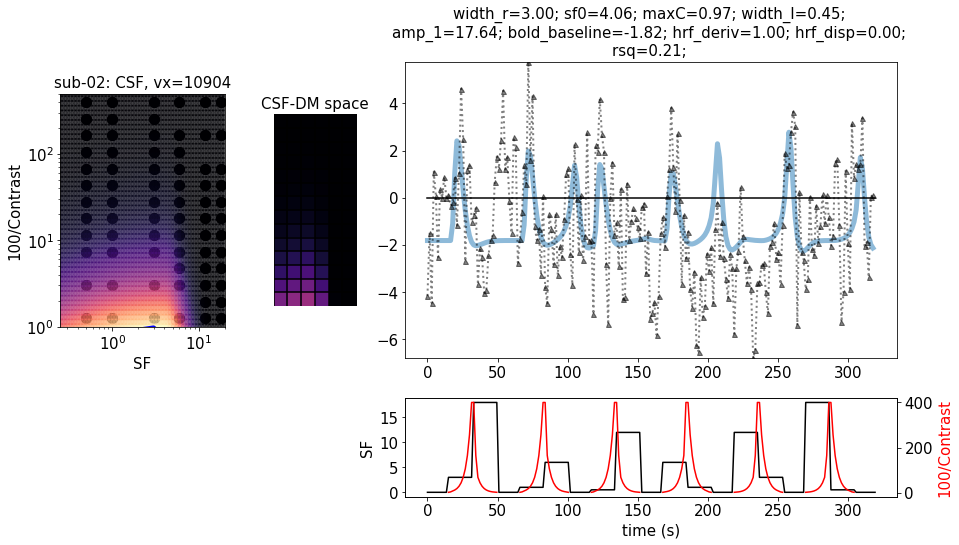

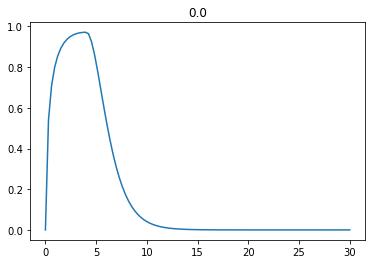

<Figure size 432x288 with 0 Axes>

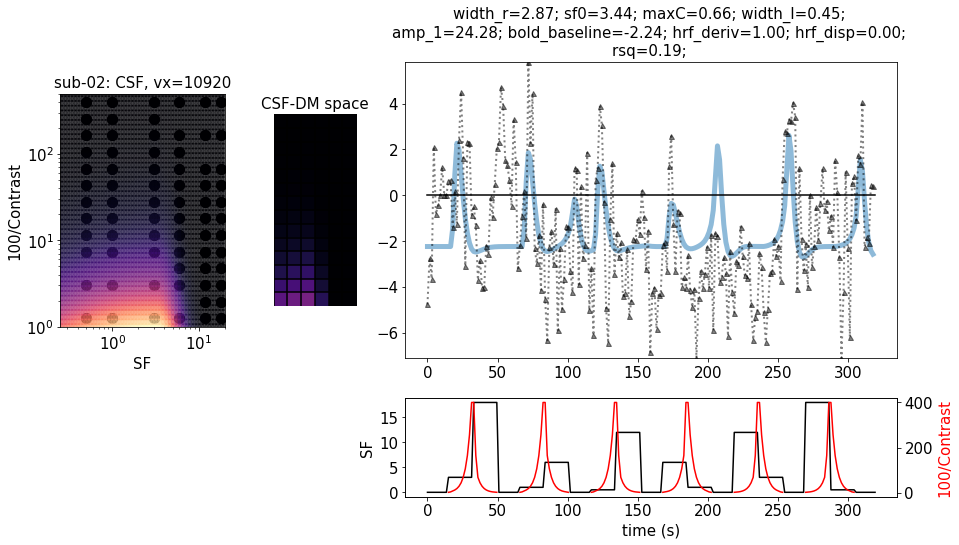

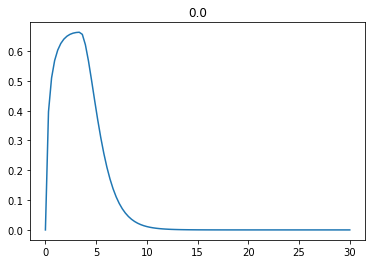

<Figure size 432x288 with 0 Axes>

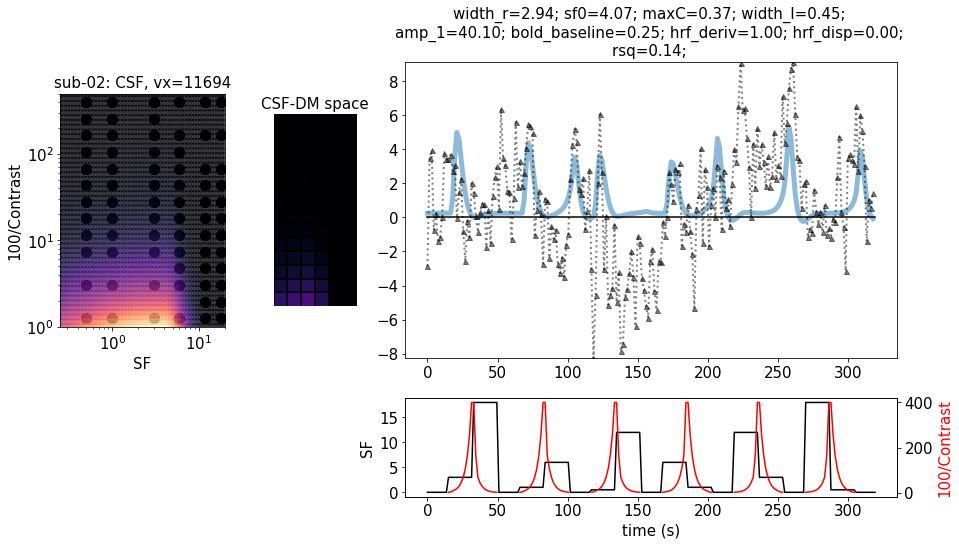

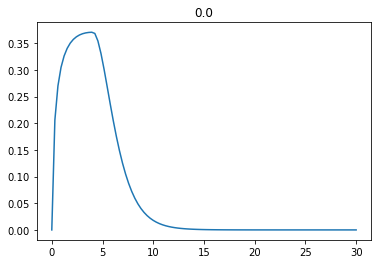

<Figure size 432x288 with 0 Axes>

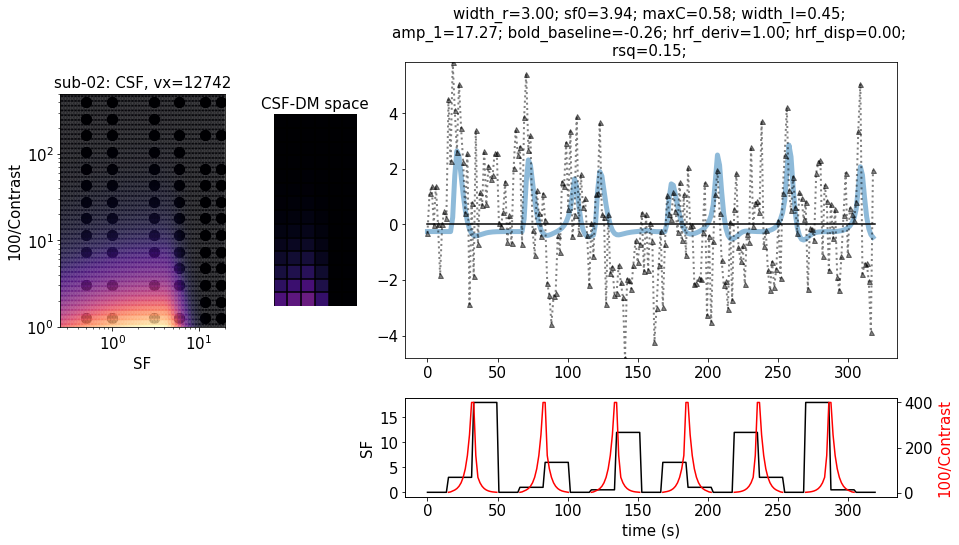

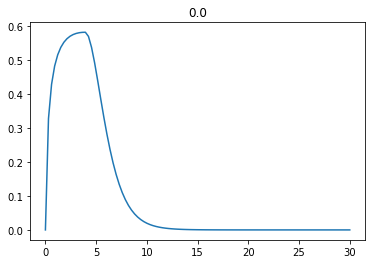

<Figure size 432x288 with 0 Axes>

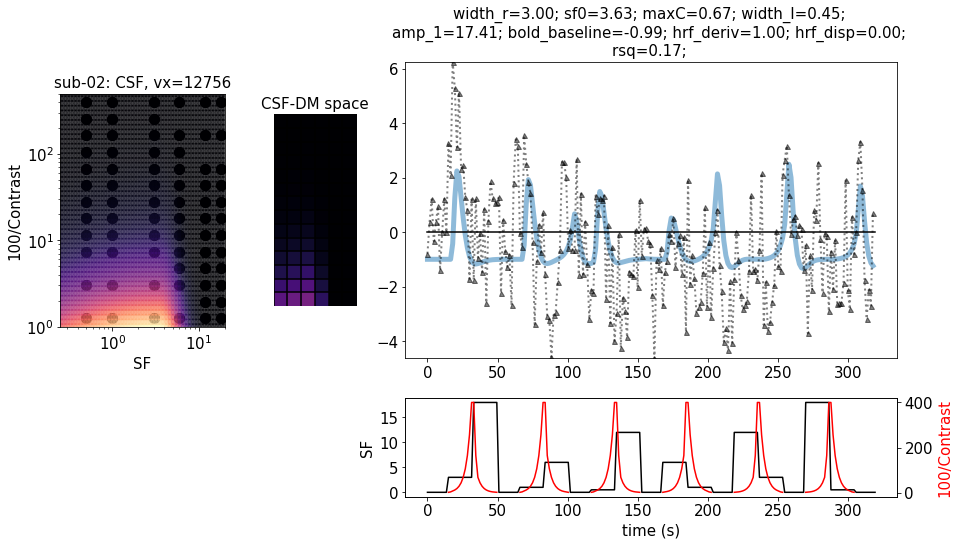

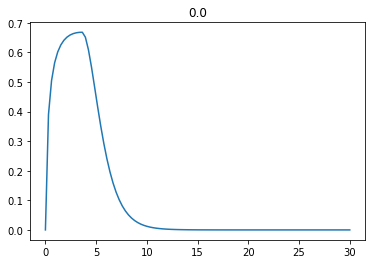

<Figure size 432x288 with 0 Axes>

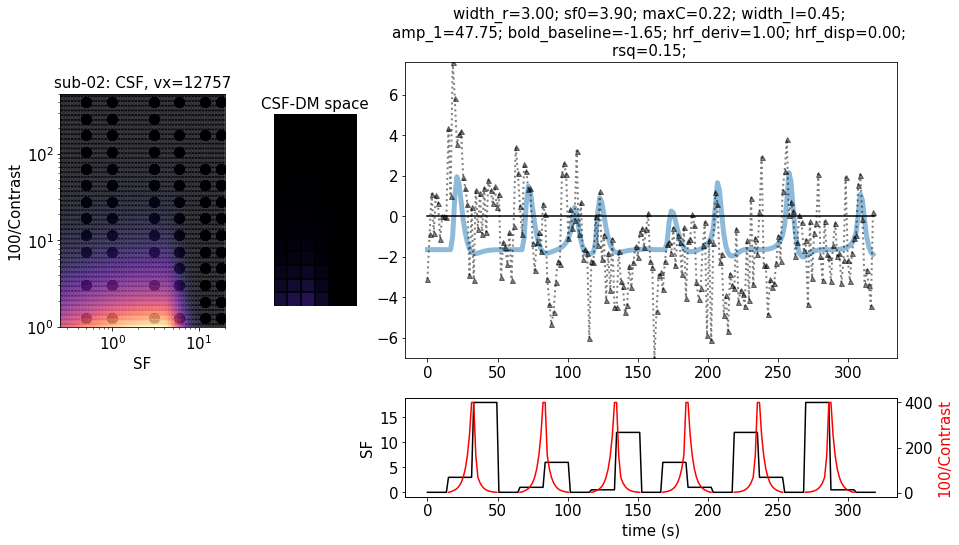

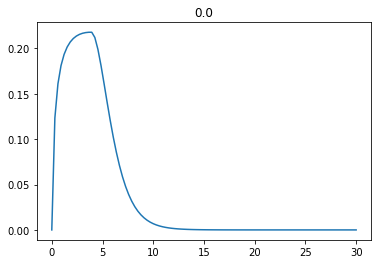

<Figure size 432x288 with 0 Axes>

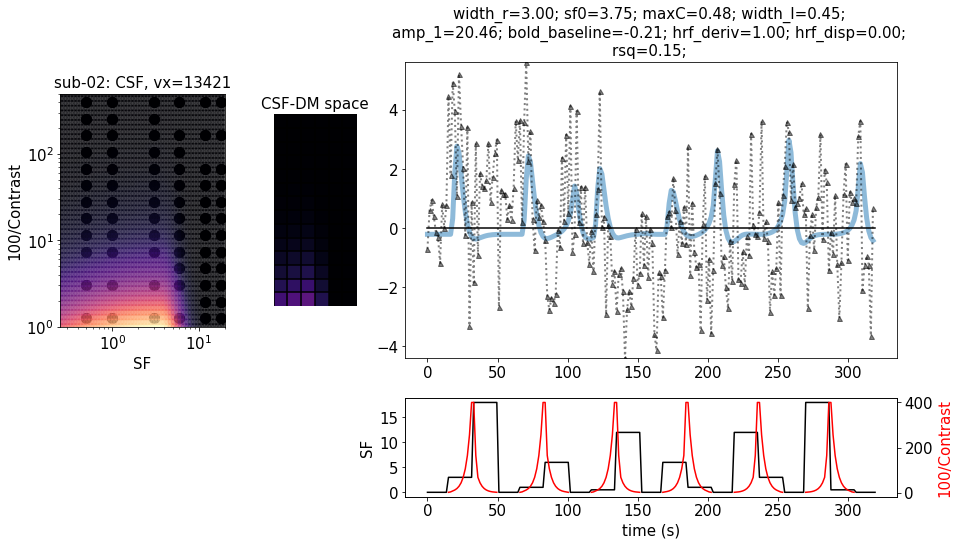

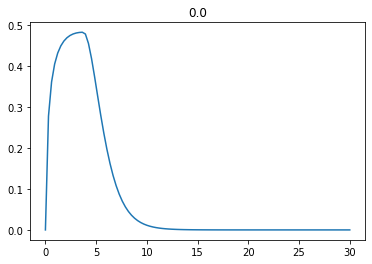

<Figure size 432x288 with 0 Axes>

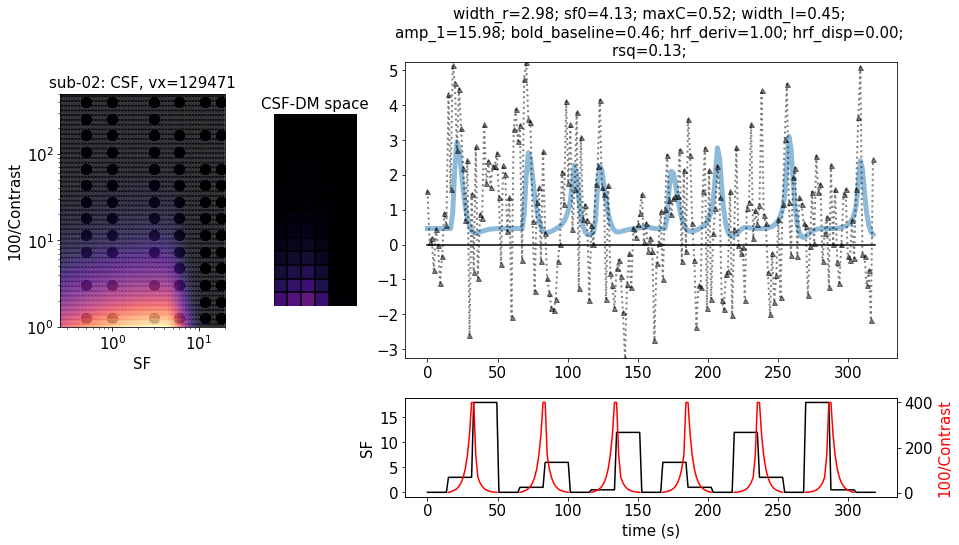

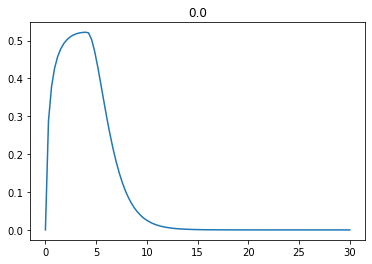

In [167]:
for id in all_good_fits[:10]:
    plt.figure()

    this_amb_plotter.csf_tc_plot(id)
    print(this_amb_plotter.pd_params['sfmax'][id])
    print(this_amb_plotter.pd_params['maxC'][id])
    plt.figure()
    SFs = np.linspace(0,30,100),
    this_curve = ncsf_curve(
        SFs = SFs,
        width_r=this_amb_plotter.pd_params['width_r'][id],
        sf0=this_amb_plotter.pd_params['sf0'][id],
        maxC=this_amb_plotter.pd_params['maxC'][id],
        width_l=this_amb_plotter.pd_params['width_l'][id],
        apply_0_th=False,
    )
    plt.plot(
        np.squeeze(SFs),
        10**np.squeeze(this_curve),
    )
    plt.title(this_amb_plotter.pd_params['sfmax'][id])

0.0

In [ ]:
# MOVIE

m = 'csf'
all_good_fits  = np.where(prf_multi[sub].return_vx_mask({'all-min-rsq':.4}))[0]
print(all_good_fits)
id = all_good_fits[0]
movie_folder = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/amb_code/reports/movie_eg'
for eye in ['L', 'R']:
    task = f'{model}{eye}E'.upper()

    amb_plotter = AmbPlotter(
        sub=sub, 
        real_tc=real_tc[sub][ses][task], 
        csf_params = prf_multi[sub].prf_obj[f'{eye}_{ses}_{m}'].prf_params_np
    )


    save_name = opj(movie_folder, f'./csf_tc_{sub}-{eye}-vx{id}')
    if not os.path.exists(save_name):
        os.mkdir(save_name)
    i_0 = 0
    i_m1 = 214
    i_step = 1
    i_fig = 0
    for i in range(i_0,i_m1,i_step):
        plt.figure()
        amb_plotter.csf_tc_plot(id, i)
        fig = plt.gcf()
        fig.savefig(f"{save_name}/file{i_fig:03}.png")
        plt.close(fig)
        print(i_fig)
        i_fig += 1

    # ffmpeg_dir = "/home/**your_name**/.conda/envs/**env_name**/bin/ffmpeg"
    ffmpeg_dir = '~/.conda/envs/dag_atlas/bin/ffmpeg'
    # Select the directory with all of the images, and file name pattern
    # >> -r 15 controls frame rate, can be faster or slower 
    os.system(f"{ffmpeg_dir} -r 5 -i {save_name}/file%03d.png -codec mpeg4 -y {save_name}_movie.mp4")
    os.system(f"rm -R {save_name}")


# 4 x 4 scatter [LE-1 vs RE-1], [LE-2 vs RE-2], [LE-1 ]


In [ ]:
# 4 x4 scatter 


In [ ]:
roi = 'b14_V2'#, 'V1_exvivo', 'V2_exvivo', 'MT_exvivo']

csf_th = {'min-rsq':.1}
for sub in sub_list:
    for ses in ['1', '2']:
        roi_mask = amb_load_roi(sub, roi)
        plt.figure()
        plt.title(f'{sub}-{ses}-N-{roi}')
        for eye in ['L', 'R']:
            prf_multi[sub].prf_obj[f'{eye}_{ses}_csf'].rsq_w_mean(
                ['width_r','sf0','maxC','width_l'], 
                th={**csf_th, 'roi':roi_mask})    
        for eye in ['L', 'R']:
            n_log_csf = ncsf_curve(
                    SFs, 
                    prf_multi[sub].prf_obj[f'{eye}_{ses}_csf'].wm_param['width_r'], 
                    prf_multi[sub].prf_obj[f'{eye}_{ses}_csf'].wm_param['sf0'], 
                    prf_multi[sub].prf_obj[f'{eye}_{ses}_csf'].wm_param['maxC'], 
                    prf_multi[sub].prf_obj[f'{eye}_{ses}_csf'].wm_param['width_l']    
                    )
            if eye=='L':
                # this_cmap = dag_get_cmap('Reds')
                # col = this_cmap(rsq_th+.2)
                col='r'
            else:
                # this_cmap = dag_get_cmap('Blues')
                # col = this_cmap(rsq_th+.1)
                col='b'
            plt.plot(
                np.log10(SFs), 
                n_log_csf, 
                color=col, 
                marker='*', 
                label=f'{eye}')
            # Also plot max
            ylim = (0,2.5)
            this_log_sf0 = np.log10(prf_multi[sub].prf_obj[f'{eye}_{ses}_csf'].wm_param['sf0'])
            plt.plot((this_log_sf0,this_log_sf0), ylim, color=col)

        plt.legend()        

In [ ]:
sub = 'sub-01'
this_PD = LE_RE_ses_violin(
    prf_multi=prf_multi[sub], 
    model='gauss', 
    param='rsq', do_matched=True, th={'all-min-rsq':.2})

In [ ]:
this_PD
from statsmodels.stats.anova import AnovaRM
aovrm2way = AnovaRM(this_PD, 'rsq', 'vx_id', within=['eye', 'ses'])
results = aovrm2way.fit()

In [ ]:
print(results)

In [ ]:


def LE_RE_ses_pd(prf_multi, model, param, th=None, do_plot=True, matched=True):        
    if th is None:
        th = {'all-min-rsq':.1}
    vx_mask = prf_multi.return_vx_mask(th)
    
    p_dict = {}
    p_dict[param] = []
    p_dict['eye'] = []
    p_dict['ses'] = []
    p_dict['vx_id'] = []

    # p_dict['model'] = []
    for eye in ['L', 'R']:
        for ses in ['1', '2']:
            # vx_mask = prf_multi.prf_obj[f'{eye}_{ses}_{model}'].return_vx_mask(th)
            this_p = prf_multi.prf_obj[f'{eye}_{ses}_{model}'].pd_params[param][vx_mask]
            # this_p = np.random.rand(len(this_p))
            p_dict[param].append(this_p)
            # this_
            p_dict['eye'].append([eye]*len(this_p))
            p_dict['ses'].append([ses]*len(this_p))
            p_dict['vx_id'].append(np.arange(len(this_p)))

    for key in p_dict.keys():                                                              
        p_dict[key] = np.concatenate(p_dict[key])                                          
    p_PD = pd.DataFrame(p_dict)    
    p_PD['eye'] = pd.Categorical(p_PD['eye'])
    p_PD['ses'] = pd.Categorical(p_PD['ses'])

    return p_PD



In [ ]:
prf_multi.id_list

In [ ]:
roi = 'all'
roi_mask = amb_load_roi(sub, roi)
model = 'csf'
for param in ['sf0', 'maxC', 'width_r', 'sfmax', 'rsq']:
    formula = f'{param} ~ C(eye) + C(ses) + C(eye):C(ses)'
    # param = 'sfmax'
    this_PD = LE_RE_ses_pd(
        prf_multi=prf_multi, 
        model='csf', 
        param=param, th={'all-min-rsq':.1, 'roi':roi_mask})
    model = ols(formula, data=this_PD).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(param)
    print(model._results.params)
    print(anova_table)
    print('')
    plt.figure()
    # # Plotting box plots
    # sns.boxplot(x='eye', y=param, hue='ses', data=this_PD)
    # plt.title(f'{param} by Eye and Treatment')
    # plt.xlabel('Eye')
    # plt.ylabel(param)
    # plt.show()

    # Plotting interaction plots
    sns.pointplot(x='eye', y=param, hue='ses', data=this_PD)
    plt.title('Interaction Plot: Visual Acuity by Eye and Treatment')
    plt.xlabel('Eye')
    plt.ylabel(param)
    plt.show()    


In [ ]:
roi = 'all'
roi_mask = amb_load_roi(sub, roi)
model = 'prf'
for param in ['ecc', 'rsq', 'rsq']:
    formula = f'{param} ~ C(eye) + C(ses) + C(eye):C(ses)'
    # param = 'sfmax'
    this_PD = LE_RE_ses_pd(
        prf_multi=prf_multi, 
        model=model, 
        param=param, th={'all-min-rsq':.1,'all-max-ecc':5, 'roi':roi_mask})
    model = ols(formula, data=this_PD).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(param)
    print(model._results.params)
    print(anova_table)
    print('')
    plt.figure()
    # # Plotting box plots
    # sns.boxplot(x='eye', y=param, hue='ses', data=this_PD)
    # plt.title(f'{param} by Eye and Treatment')
    # plt.xlabel('Eye')
    # plt.ylabel(param)
    # plt.show()

    # Plotting interaction plots
    sns.pointplot(x='eye', y=param, hue='ses', data=this_PD)
    plt.title('Interaction Plot: Visual Acuity by Eye and Treatment')
    plt.xlabel('Eye')
    plt.ylabel(param)
    plt.show()    


In [ ]:
# model._results.__dict__.keys()


In [ ]:




# this_PD = LE_RE_ses_violin(
#     prf_multi=prf_multi, 
#     model='csf', 
#     param='sfmax', th={'min-rsq':.1}, do_plot = False)
# # Performing two-way ANOVA
# model = ols(
#     'height ~ C(Fertilizer) + C(Watering) +\
#     C(Fertilizer):C(Watering)', data=df).fit()
# sm.stats.anova_lm(model, typ=2)

In [ ]:
# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)






In [ ]:
prf_multi.id_list

In [ ]:
sub_list = ['sub-01', 'sub-02']
roi_fit = 'all'


In [ ]:
# prf_data = {}
# csf_data = {}
# real_tc = {}
# pred_tc = {}
# pred_tc = {}
prf_objs = {}
all_prf_objs = {}
for sub in sub_list:

    # LOAD USEFUL INFORMATION
    prf_data = amb_load_prf_params(
        sub=sub,
        task_list=['pRFLE', 'pRFRE'],
        model_list='gauss',
        roi_fit=roi_fit,            
    )

    csf_data = amb_load_prf_params(
        sub=sub,
        task_list=['CSFLE', 'CSFRE'],
        model_list='csf',
        roi_fit=roi_fit,            
    )

    # real_tc[sub] = amb_load_real_tc(sub=sub, task_list=['pRFLE', 'pRFRE', 'CSFLE', 'CSFRE'])
    # pred_tc[sub] = amb_load_pred_tc(sub=sub, task_list=['pRFLE', 'pRFRE'], model_list='gauss')
    # pred_tc[sub] |= amb_load_pred_tc(sub=sub, task_list=['CSFRE', 'CSFLE'], model_list='csf')

    # Enter into prf objects:
    prf_obj_list = []
    prf_id_list = []
    prf_obj = {}
    model = 'gauss'
    for task in ['pRFLE', 'pRFRE']:    
        prf_obj[task] = {}    
        prf_obj[task][model] = Prf1T1M(prf_data[task][model], model)
        prf_obj_list.append(Prf1T1M(prf_data[task][model], model))
        prf_id_list.append(task)

    model = 'csf'
    for task in ['CSFLE', 'CSFRE']:    
        prf_obj[task] = {}    
        prf_obj[task][model] = Prf1T1M(csf_data[task][model], model)

        prf_obj_list.append(Prf1T1M(csf_data[task][model], model, fixed_hrf=True))
        prf_id_list.append(task)

    prf_objs[sub] = prf_obj
    all_prf_objs[sub] = PrfMulti(prf_obj_list, prf_id_list)

In [ ]:

def mini_show_csf_param(param, min_rsq, bins):
    for sub in sub_list:
        plt.figure()
        all_prf_objs[sub].rapid_hist(
            f'CSFLE-{param}', label=f'LE-{param}', color=plot_cols['LE'], bins=bins,ax=plt.gca(),
            th={'CSFLE-min-rsq':min_rsq})
        all_prf_objs[sub].rapid_hist(
            f'CSFRE-{param}', label=f'RE-{param}', color=plot_cols['RE'], bins=bins,ax=plt.gca(),
            th={'CSFRE-min-rsq':min_rsq})
        plt.title(sub)

        plt.figure()
        all_prf_objs[sub].rapid_p_corr(
            f'CSFLE-{param}', f'CSFRE-{param}', ax=plt.gca(),do_line=True,do_id_line=True,
            th={'CSFLE-min-rsq':min_rsq, 'CSFRE-min-rsq':min_rsq})
        plt.title(sub)


In [ ]:
min_rsq = .2
bins = np.linspace(0,6,10)
param = 'sf0'
mini_show_csf_param(param, min_rsq, bins)

In [ ]:
min_rsq = .1
bins = np.linspace(0,6,20)
param = 'width_r'
mini_show_csf_param(param, min_rsq, bins)

In [ ]:
# prf_obj['pRFLE']['gauss'].rapid_p_corr('ecc', 'size_1', th={'min-rsq':.1, 'max-ecc':5}, do_line=True)

# plt.figure()
# prf_obj['pRFRE']['gauss'].rapid_p_corr('ecc', 'size_1', th={'min-rsq':.1, 'max-ecc':5}, do_line=True)

# plt.figure()

all_prf_obj2.rapid_p_corr(
    'pRFLE-ecc', 'pRFLE-size_1', do_line=True, do_scatter=False, line_label='LE',
    th={'pRFLE-min-rsq':.1, 'pRFLE-max-ecc':5,})

all_prf_obj2.rapid_p_corr(    
    'pRFRE-ecc', 'pRFRE-size_1',ax=plt.gca(), do_line=True, do_scatter=False, line_col='b', line_label='RE',
    th={'pRFRE-min-rsq':.1, 'pRFRE-max-ecc':5,})

In [ ]:
# csf_tc_plotter(
#     real_tc=real_tc['CSFLE'], 
#     pred_tc=pred_tc['CSFLE'], 
#     params=prf_obj['CSFLE']['csf'].prf_params_np, idx=[8,10])
from amb_scripts.plot_csfv3 import *


In [ ]:
amb_plotter = AmbPlotter(
    sub=sub, 
    real_tc=real_tc['CSFLE'],
    csf_params = csf_data['CSFLE']['csf'],
    
    )

In [ ]:
amb_plotter.csf_tc_plot(idx=8, time_pt=None)

In [ ]:
np.where(prf_obj['CSFLE']['csf'].prf_params_np[:,-1]>0.1)

In [ ]:
# # # all_prf_obj.rapid_hist(ax=plt.gca(), px='pRFLE-hrf_deriv', alpha=0.5)
# # # all_prf_obj.rapid_hist(ax=plt.gca(), px='pRFRE-hrf_deriv', alpha=0.5)
# # all_prf_obj.rapid_hist(ax=plt.gca(), px='CSFRE-hrf_deriv', alpha=0.5)
# # all_prf_obj.rapid_hist(ax=plt.gca(), px='CSFLE-hrf_deriv', alpha=0.5)

# all_prf_obj.rapid_p_corr(
#     'CSFLE-rsq',
#     'CSFRE-rsq', 
#     th={'CSFLE-min-rsq':.1, 'CSFRE-min-rsq':.1}, 
#     do_line=True, line_col='r', dot_col='k', dot_alpha=.5)

In [ ]:
# prf_dE = Prf1T1Mx2(prf_obj['pRFLE']['gauss'], prf_obj['pRFRE']['gauss'], id1='prfLE', id2='prfRE')
# csf_dE = Prf1T1Mx2(prf_obj['CSFLE']['csf'], prf_obj['CSFRE']['csf'], id1='csfLE', id2='csfRE')
# le_dT =  Prf1T1Mx2(prf_obj['pRFLE']['gauss'], prf_obj['CSFLE']['csf'], id1='prfLE', id2='csfLE')
# re_dT =  Prf1T1Mx2(prf_obj['pRFRE']['gauss'], prf_obj['CSFRE']['csf'], id1='prfRE', id2='csfRE')

In [ ]:
# # prf_dE.rapid_p_corr(
# #     'prfLE-hrf_deriv',
# #     'prfRE-hrf_deriv'
# # )
# # plt.figure()
# # csf_dE.rapid_p_corr(
# #     'csfLE-hrf_deriv',
# #     'csfRE-hrf_deriv'
# # )

# # plt.figure()
# # le_dT.rapid_p_corr(
# #     'csfLE-hrf_deriv',
# #     'prfLE-hrf_deriv'
# # )

# roi = amb_load_roi(sub, 'demo-5000000')
# plt.figure()
# re_dT.rapid_p_corr(
#     'prfRE-hrf_deriv',
#     'csfRE-hrf_deriv',
#     th={'all-min-rsq':.3, 'roi':roi},
# )

In [ ]:
fs = FSMaker(sub, fs_dir)
model = 'gauss'
# POLAR 
for task in task_list:
    # fs.add_surface(
    #     data = prf_obj[task][model].pd_params['pol'],
    #     surf_name = f'{sub}-{task}-{model}-pol',    
    #     vmin = -np.pi, vmax=np.pi , # min and max values of polar anlge 
    #     data_mask=prf_obj[task][model].return_vx_mask({'min-rsq':.1}),
    #     cmap = 'hsv_hsv', # using hsv for polar angle, can use something else...
    # )
    # POL CLOCK
    clock_val = dag_pol_to_clock(prf_obj[task][model].pd_params['pol'])
    fs.add_surface(
        data = clock_val,
        surf_name = f'{sub}-{task}-{model}-pol-clock',    
        vmin = 0, vmax=12, # min and max values of polar anlge 
        data_mask=prf_obj[task][model].return_vx_mask({'min-rsq':.1}),
        cmap = 'magma_viridis', # using hsv for polar angle, can use something else...
        cmap_nsteps=20
    )    
# model = 'csf'
# for task in ['CSFLE', 'CSFRE']:
#     fs.add_surface(
#         data = clock_val,
#         surf_name = f'{sub}-{task}-{model}-pol-clock',    
#         vmin = 0, vmax=12, # min and max values of polar anlge 
#         data_mask=prf_obj[task][model].return_vx_mask({'min-rsq':.1}),
#         cmap = 'twilight', # using hsv for polar angle, can use something else...
#         cmap_nsteps=20
#     )        


# # d_val
# model = 'norm'
# for task in task_list:
#     fs.add_surface(
#         data = prf_obj[task][model].pd_params['d_val'],
#         surf_name = f'{sub}-{task}-{model}-d_val',    
#         vmin = 0, vmax=100, # min and max values of polar anlge 
#         data_mask=prf_obj[task][model].return_vx_mask({'min-rsq':.1}),
#         cmap = 'jet', # using hsv for polar angle, can use something else...
#     )


# # b_val
# model = 'norm'
# for task in task_list:
#     fs.add_surface(
#         data = prf_obj[task][model].pd_params['b_val'],
#         surf_name = f'{sub}-{task}-{model}-b_val',    
#         vmin = 0, vmax=100, # min and max values of polar anlge 
#         data_mask=prf_obj[task][model].return_vx_mask({'min-rsq':.1}),
#         cmap = 'viridis', # using hsv for polar angle, can use something else...
#     )


# size_1
# model = 'gauss'
# for task in task_list:
#     fs.add_surface(
#         data = prf_obj[task][model].pd_params['size_1'],
#         surf_name = f'{sub}-{task}-{model}-size_1',    
#         vmin = 0, vmax=10, # min and max values of polar anlge 
#         data_mask=prf_obj[task][model].return_vx_mask({'min-rsq':.1}),
#         cmap = 'ecc', # using hsv for polar angle, can use something else...
#     )


In [ ]:
fs.open_fs_surface(
    fs.surf_list, 
    mesh='inflated', 
    # roi_list=['v1custom', 'v2custom', 'v3custom', 'LOcustom']
    )

In [ ]:
dag_stack_cmaps(['magma','viridis'])#, save_cmap=True)#, 'magma_r'])
# a = dag_get_cmap('viridis_magmarev')

# plt.imshow(
#     np.linspace(0,1,1000)*np.ones((100,1000)),
#     cmap=a, vmin=0, vmax=1)

# dag_make_custom_cmap(
#     ['green', 'green'], cmap_name='blah', save_cmap=True
# )


In [ ]:
# dag_get_cmap('blah')
dag_stack_cmaps(['plasma_r'])

***